In [1]:
import pandas as pd
import numpy as np

filename = 'BRAZPD_UnofM_all.csv'

df = pd.read_csv(filename, engine='python')


In [2]:
display(df)

,CODPAX,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,Mean_PAS_2T,Mean_PAD_2T,Mean_PAS_3T,Mean_PAD_3T,...,Diastolic70,Systolic71,Diastolic71,Systolic72,Diastolic72,Systolic73,Diastolic73,Systolic74,Diastolic74,_merge
0,1349037,12.933333,4.433333,5.300000,110.500000,70.000000,125.000000,80.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,1349040,14.000000,3.766667,5.933333,129.500000,77.000000,120.333333,68.666667,136.000000,82.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,1349048,11.833333,4.366667,6.100000,158.000000,81.000000,154.666667,87.666667,147.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1349051,10.066667,4.733333,5.533333,140.000000,75.000000,147.333333,92.333333,169.333333,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,1349055,11.933333,4.033333,4.066667,103.500000,60.000000,154.666667,82.000000,129.333333,72.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,126.666667,76.666667,126.666667,83.333333,120.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5703,347457071,9.700000,4.300000,3.233333,130.000000,80.000000,113.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5704,347457072,10.466667,4.433333,4.466667,136.666667,80.000000,143.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5705,347457073,11.766667,4.533333,3.566667,126.666667,80.000000,136.666667,83.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


# Data Cleaning

In [3]:
import re

nMeasurements = 75
nColumns = 1735
nRecords = 5707
timeseries_names = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit','Volume_Total', 'Systolic', 'Diastolic', 'N_AH_']

different_format_ts_names = ['Mes_1_PAS', 'Mes_1_PAD', 'Mes_1_Uso_de_anti_hipert', 'Mes_1_inibidor',\
                             'Mes_1_beta', 'Mes_1_ant', 'Mes_1_diu', 'Mes_1_at_i', 'Mes_1_OUTROS']

# Put timeseries names into standard format
p = re.compile('[0-9]')
strip = re.compile('Mes_[0-9]_')
for timeseries in different_format_ts_names:
    for i in range(1,nMeasurements):
        try:
            old_label = p.sub(str(i), timeseries)
            new_label = strip.sub('',timeseries)
            df[new_label+str(i)] = pd.Series(df[old_label])
            df.drop([old_label],axis=1, inplace=True)
        except:
            print(f'Column {timeseries}{i} does not exist')
    timeseries_names.append(new_label)
    
# make sure we don't have duplicate columns
assert nColumns == df.shape[1]

rename_dict = dict()
rename_keys = {"Uso_de_anti_hipert": "Use antihypertensive drug",\
               "inibidor": "ACE-inhibitor",\
               "at_i": "ATI blocker",\
               "beta": "beta-blocker",\
               "ant": "calcium antagonist",\
               "diu": "diuretic"}
for item in rename_keys.items():
    key, value = item
    for i in range(74):
        new_key = key+str(i+1)
        new_value = value+str(i+1)
        rename_dict[new_key] = new_value
        
df = df.rename(columns=rename_dict)

display(df)

,CODPAX,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,Mean_PAS_2T,Mean_PAD_2T,Mean_PAS_3T,Mean_PAD_3T,...,OUTROS65,OUTROS66,OUTROS67,OUTROS68,OUTROS69,OUTROS70,OUTROS71,OUTROS72,OUTROS73,OUTROS74
0,1349037,12.933333,4.433333,5.300000,110.500000,70.000000,125.000000,80.000000,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1349040,14.000000,3.766667,5.933333,129.500000,77.000000,120.333333,68.666667,136.000000,82.000000,...,0,0,0,0,0,0,0,0,0,0
2,1349048,11.833333,4.366667,6.100000,158.000000,81.000000,154.666667,87.666667,147.000000,80.000000,...,0,0,0,0,0,0,0,0,0,0
3,1349051,10.066667,4.733333,5.533333,140.000000,75.000000,147.333333,92.333333,169.333333,99.000000,...,0,0,0,0,0,0,0,0,0,0
4,1349055,11.933333,4.033333,4.066667,103.500000,60.000000,154.666667,82.000000,129.333333,72.666667,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,126.666667,76.666667,126.666667,83.333333,120.000000,80.000000,...,0,0,0,0,0,0,0,0,0,0
5703,347457071,9.700000,4.300000,3.233333,130.000000,80.000000,113.333333,73.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5704,347457072,10.466667,4.433333,4.466667,136.666667,80.000000,143.333333,73.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5705,347457073,11.766667,4.533333,3.566667,126.666667,80.000000,136.666667,83.333333,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print('Age average:', np.mean(df['Age']))
print('Age std:', np.std(df['Age']))
print('Male gender:', df[df['Gender']==1].shape[0]/df.shape[0])
print('Previous HD:', df[df['PreviousHD']==1].shape[0]/df.shape[0])
print('Hypertension:', df[df['Hypertension']==1].shape[0]/df.shape[0])
print('pre-dialysis care:', df[df['predialysiscare']==1].shape[0]/df.shape[0])
print('BMI (<18.5):', df[df['BMI']<18.5].shape[0]/df.shape[0])
print('BMI (18.5-24.9):', (df[df['BMI'] <25].shape[0] - df[df['BMI']<18.5].shape[0])/df.shape[0])
# print('BMI (18.5-24.9):', df[(df['BMI'] <25) & (df['BMI']>=18.5)].shape[0]/df.shape[0])
print('BMI (>=25):', df[df['BMI']>=25].shape[0]/df.shape[0])
print('Davies score (0):', df[df['DaviesScore']==0].shape[0]/df.shape[0])
print('Davies score (1-2):', df[df['DaviesScore']==1].shape[0]/df.shape[0] + df[df['DaviesScore']==2].shape[0]/df.shape[0])
print('Davies score (3-4):', df[df['DaviesScore']==3].shape[0]/df.shape[0] + df[df['DaviesScore']==4].shape[0]/df.shape[0])
print('Family income (0):', df[df['Familyincome']==1].shape[0]/df.shape[0])
print('Family income (1-2):', df[df['Familyincome']==2].shape[0]/df.shape[0])
print('Family income (5-10):', df[df['Familyincome']==3].shape[0]/df.shape[0])
print('Family income (10-20):', df[df['Familyincome']==4].shape[0]/df.shape[0])
print('Family income (>20):', df[df['Familyincome']==5].shape[0]/df.shape[0])
print('Race (white):', df[df['Race']==1].shape[0]/df.shape[0])
print('Race (black):', df[df['Race']==4].shape[0]/df.shape[0])
print('Race (others):', df[(df['Race']==2) | (df['Race']==3) | (df['Race']==5)].shape[0]/df.shape[0])
print('Distance from center (1):', df[df['Distancefromcenter']==1].shape[0]/df.shape[0])
print('Distance from center (2):', df[df['Distancefromcenter']==2].shape[0]/df.shape[0])
print('Distance from center (3):', df[df['Distancefromcenter']==3].shape[0]/df.shape[0])
print('Primary renal disease (Diabetes):', df[df['Primaryrenaldisease']==81].shape[0]/df.shape[0])
print('Primary renal disease (Hypertension):', df[df['Primaryrenaldisease']==100].shape[0]/df.shape[0])
print('Primary renal disease (CGN (including LES)):', df[df['Primaryrenaldisease']==13].shape[0]/df.shape[0] + df[df['Primaryrenaldisease']==10].shape[0]/df.shape[0])
print('Primary renal disease (Unknown):', df[df['Primaryrenaldisease']==0].shape[0]/df.shape[0])
print('Primary renal disease (Others):', df[df['Primaryrenaldisease']==20].shape[0]/df.shape[0] + df[df['Primaryrenaldisease']==30].shape[0]/df.shape[0] + df[df['Primaryrenaldisease']==40].shape[0]/df.shape[0] + df[df['Primaryrenaldisease']==42].shape[0]/df.shape[0] + df[df['Primaryrenaldisease']==70].shape[0]/df.shape[0]+ df[df['Primaryrenaldisease']==50].shape[0]/df.shape[0])
print('Education level (0):', df[df['Educationdic4y']==0].shape[0]/df.shape[0])
print('Education level (1):', df[df['Educationdic4y']==1].shape[0]/df.shape[0])
print('Center experience average:', np.mean(df['Centerexperiencepatientyear']))
print('Center experience std:', np.std(df['Centerexperiencepatientyear']))
print('Center experience (<=11):', df[df['Centerexperiencepatientyear']<=11].shape[0]/df.shape[0])
print('Center experience (11.1-25):', df[df['Centerexperiencepatientyear']<=25].shape[0]/df.shape[0] - df[df['Centerexperiencepatientyear']<=11].shape[0]/df.shape[0])
print('Center experience (>25):', df[df['Centerexperiencepatientyear']>25].shape[0]/df.shape[0])
print('Time of pre-dialysis care avg:', np.mean(df['timeofpredialysiscare']))
print('Time of pre-dialysis care std:', np.std(df['timeofpredialysiscare']))

Age average: 59.40376730331173
Age std: 15.950564887765756
Male gender: 0.4752058875065709
Previous HD: 0.4198352899947433
Hypertension: 0.7266514806378133
pre-dialysis care: 0.5046434203609602
BMI (<18.5): 0.06308042754512003
BMI (18.5-24.9): 0.49342912213071666
BMI (>=25): 0.4145785876993166
Davies score (0): 0.3700718415980375
Davies score (1-2): 0.5710530926931838
Davies score (3-4): 0.05887506570877869
Family income (0): 0.3290695636937095
Family income (1-2): 0.46276502540739445
Family income (5-10): 0.14753811109164183
Family income (10-20): 0.03697213947783424
Family income (>20): 0.0
Race (white): 0.6395654459435781
Race (black): 0.11932714210618539
Race (others): 0.24110741195023655
Distance from center (1): 0.5696513054144033
Distance from center (2): 0.21692658139127388
Distance from center (3): 0.11231820571228317
Primary renal disease (Diabetes): 0.37217452251620814
Primary renal disease (Hypertension): 0.1678640266339583
Primary renal disease (CGN (including LES)): 0.093

In [5]:
df.loc[df['Primaryrenaldisease']==81,'Primary renal disease (Diabetes)'] = 1

df.loc[df['Primaryrenaldisease']==100,'Primary renal disease (Hypertension)'] = 1

df.loc[df['Primaryrenaldisease']==13,'Primary renal disease (CGN (including LES))'] = 1
df.loc[df['Primaryrenaldisease']==10,'Primary renal disease (CGN (including LES))'] = 1

df.loc[df['Primaryrenaldisease']==0,'Primary renal disease (Unknown)'] = 1

df.loc[df['Primaryrenaldisease']==20,'Primary renal disease (Others)'] = 1
df.loc[df['Primaryrenaldisease']==20,'Primary renal disease (Others)'] = 1
df.loc[df['Primaryrenaldisease']==30,'Primary renal disease (Others)'] = 1
df.loc[df['Primaryrenaldisease']==40,'Primary renal disease (Others)'] = 1
df.loc[df['Primaryrenaldisease']==42,'Primary renal disease (Others)'] = 1
df.loc[df['Primaryrenaldisease']==50,'Primary renal disease (Others)'] = 1
df.loc[df['Primaryrenaldisease']==70,'Primary renal disease (Others)'] = 1

df.fillna(0)

,CODPAX,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,Mean_PAS_2T,Mean_PAD_2T,Mean_PAS_3T,Mean_PAD_3T,...,OUTROS70,OUTROS71,OUTROS72,OUTROS73,OUTROS74,Primary renal disease (Diabetes),Primary renal disease (Hypertension),Primary renal disease (CGN (including LES)),Primary renal disease (Unknown),Primary renal disease (Others)
0,1349037,12.933333,4.433333,5.300000,110.500000,70.000000,125.000000,80.000000,0.000000,0.000000,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
1,1349040,14.000000,3.766667,5.933333,129.500000,77.000000,120.333333,68.666667,136.000000,82.000000,...,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0
2,1349048,11.833333,4.366667,6.100000,158.000000,81.000000,154.666667,87.666667,147.000000,80.000000,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
3,1349051,10.066667,4.733333,5.533333,140.000000,75.000000,147.333333,92.333333,169.333333,99.000000,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
4,1349055,11.933333,4.033333,4.066667,103.500000,60.000000,154.666667,82.000000,129.333333,72.666667,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,126.666667,76.666667,126.666667,83.333333,120.000000,80.000000,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
5703,347457071,9.700000,4.300000,3.233333,130.000000,80.000000,113.333333,73.333333,0.000000,0.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
5704,347457072,10.466667,4.433333,4.466667,136.666667,80.000000,143.333333,73.333333,0.000000,0.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
5705,347457073,11.766667,4.533333,3.566667,126.666667,80.000000,136.666667,83.333333,0.000000,0.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0


# Feature Selection and Combination

In [6]:
# Separate features to unique features and time series features
timeseries_cols = []
time_indices = str(np.arange(100))
# print(time_indices)
for col in list(df.columns):
    add = True
    for idx in time_indices:
        if idx in col:
            add = False
    if add == False:
        timeseries_cols.append(col)
        
# Adjust missclassified features
adjlist = ['ModalidadeCAPD0APD1Mix2', 'Dropoutsim1', 'Agedic65', 'Educationdic4y', 
           'Followup1y', 'Followup2y', 'Followup3y', "death_event_1y","Tech_event_1y",
          "death_event_2y","Tech_event_2y", "death_event_3y","Tech_event_3y"]
for i in range(len(adjlist)):
    timeseries_cols.remove(adjlist[i])
    
unique_cols = ['Hemoglobin', 'Potassium', 'Phosphate',\
                 'FRR', 'codigoclinica', 'ModalidadeCAPD0APD1Mix2',\
                'CenterSizenpatients', 'ModalidadeDPInicial', 'Age',\
                'BMI','IncidentinPD', 'PrevalentinPDNet', \
                'DialysisvintageprePDNet', 'totaldialysisvintage',\
                'Primary renal disease (Diabetes)','Primary renal disease (Hypertension)',\
                'Primary renal disease (CGN (including LES))', 'Primary renal disease (Unknown)',\
                'Primary renal disease (Others)', 'PreviousHD',\
                'Previoustx', 'DaviesScore', 'Peripheralarterydisease',\
                'DM', 'CAD', 'LVH', 'LES', 'HF', 'Cancer', 'Stroke',\
                'Hypertension', 'HIV', 'HCV', 'HBC', 'Gender',\
                'Familyincome', 'Distancefromcenter', 'predialysiscare',\
                'timeofpredialysiscare', 'Racedicwhite', 'Educationdic4y',\
                'Region', 'Centerexperiencepatientyear',\
                'Regionsdic', 'cidade']

print(unique_cols)
print(timeseries_cols)

['Hemoglobin', 'Potassium', 'Phosphate', 'FRR', 'codigoclinica', 'ModalidadeCAPD0APD1Mix2', 'CenterSizenpatients', 'ModalidadeDPInicial', 'Age', 'BMI', 'IncidentinPD', 'PrevalentinPDNet', 'DialysisvintageprePDNet', 'totaldialysisvintage', 'Primary renal disease (Diabetes)', 'Primary renal disease (Hypertension)', 'Primary renal disease (CGN (including LES))', 'Primary renal disease (Unknown)', 'Primary renal disease (Others)', 'PreviousHD', 'Previoustx', 'DaviesScore', 'Peripheralarterydisease', 'DM', 'CAD', 'LVH', 'LES', 'HF', 'Cancer', 'Stroke', 'Hypertension', 'HIV', 'HCV', 'HBC', 'Gender', 'Familyincome', 'Distancefromcenter', 'predialysiscare', 'timeofpredialysiscare', 'Racedicwhite', 'Educationdic4y', 'Region', 'Centerexperiencepatientyear', 'Regionsdic', 'cidade']
['Mean_PAS_1T', 'Mean_PAD_1T', 'Mean_PAS_2T', 'Mean_PAD_2T', 'Mean_PAS_3T', 'Mean_PAD_3T', 'Mean_PAS_4T', 'Mean_PAD_4T', 'Mean_PAS_5T', 'Mean_PAD_5T', 'Mean_PAS_6T', 'Mean_PAD_6T', 'Mean_PAS_7T', 'Mean_PAD_7T', 'Mean_P

In [7]:
# build baseline dataframe (without time-series data):
df_baseline = df[unique_cols].copy()
df_baseline = df_baseline.fillna(0)

# display(df_baseline)

targets = ['Dropoutsim1', 'Followup1y', 'Followup2y', 'Followup3y',\
           "death_event_1y","Tech_event_1y",\
           "death_event_2y","Tech_event_2y",\
           "death_event_3y","Tech_event_3y",\
           "Deathevent","TechniqueFailureevent","Causeofdeath","TechFailureDeathnotcens","Causeofdropout",\
           "Followup"]

# build targets dataframe:
Y = df[targets+['CODPAX']].copy()
# display(Y)

In [8]:
df_totalaverage = df[unique_cols].copy()

# rename column name to understandable English
df_totalaverage = df_totalaverage.rename(columns={"codigoclinica": "Clinic code",\
                                                  "ModalidadeCAPD0APD1Mix2": "CAPD0APD1Mix2 modality",\
                                                  "CenterSizenpatients": "Center size (patients)",\
                                                  "ModalidadeDPInicial": "Initial modality of PD",\
                                                  "IncidentinPD": "Incident in PD",\
                                                  "PrevalentinPDNet": "Prevalent in PD Net",\
                                                  "DialysisvintageprePDNet": "Dialysis vintage pre PD Net",\
                                                  "totaldialysisvintage": "Total dialysis vintage",\
                                                  "PreviousHD": "Previous HD",\
                                                  "Previoustx": "Previous tx",\
                                                  "DaviesScore": "Davies Score",\
                                                  "Peripheralarterydisease": "Peripheral artery disease",\
                                                  "Familyincome": "Family income",\
                                                  "Distancefromcenter": "Distance from center",\
                                                  "predialysiscare": "Predialysis care",\
                                                  "timeofpredialysiscare": "Time of predialysis care",\
                                                  "Racedicwhite": "Race is white",\
                                                  "Educationdic4y": "Education more than 4 years",\
                                                  "Centerexperiencepatientyear": "Center experience (patient-year)",\
                                                  "cidade": "City"})

Group_p1 = []
Ms10ou_p1 = []

storage_p1 = [Group_p1, Ms10ou_p1]

Mean_PAS_p1 = []
Mean_PAD_p1 = []

Mean_PAS_p2 = []
Mean_PAD_p2 = []

storage_p2 = [Mean_PAS_p1, Mean_PAD_p1, Mean_PAS_p2, Mean_PAD_p2]

Ureia = dict()
Creatinine = dict()
TGP = dict()
Potassium = dict()
Calcium = dict()
Phosphate = dict()
Glucose = dict()
Hemoglobin = dict()
Hematocrit = dict()
Volume_Total = dict()
N_AH_ = dict()
Systolic = dict()
Diastolic = dict()
PAS = dict()
PAD = dict()
Uso_de_anti_hipert = dict()
inibidor = dict()
at_i = dict()
beta = dict()
ant = dict()
diu = dict()

# label_dict = [Ureia, Creatinine, TGP, Potassium, Calcium, Phosphate, Glucose, 
#               Hemoglobin, Hematocrit, Volume_Total, N_AH_, Systolic, Diastolic, PAS, PAD, Uso_de_anti_hipert, inibidor]

# label_str = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
#               'Hemoglobin', 'Hematocrit','Volume_Total', 'N_AH_', 'Systolic', 'Diastolic','PAS','PAD',
#              'Uso_de_anti_hipert', 'inibidor']

# remove Volume_Total and N_AH_

label_dict = [Ureia, Creatinine, TGP, Potassium, Calcium, Phosphate, Glucose, 
              Hemoglobin, Hematocrit, Systolic, Diastolic, PAS, PAD, Uso_de_anti_hipert, 
              inibidor, at_i, beta, ant, diu]

# label_str = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate',\
#              'Glucose', 'Hemoglobin', 'Hematocrit', 'Systolic', 'Diastolic','PAS','PAD',\
#              'Uso_de_anti_hipert', 'inibidor', 'at_i', 'beta', 'ant', 'diu']

label_str = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate',\
             'Glucose', 'Hemoglobin', 'Hematocrit', 'Systolic', 'Diastolic','PAS','PAD',\
             'Use antihypertensive drug', 'ACE-inhibitor', 'ATI blocker', 'beta-blocker',\
             'calcium antagonist', 'diuretic']

for item in label_dict:
    for i in range(13):
        key = 'p'+str(i+1)
        item[key] = []
    
label_idx = 0    
for item in label_dict:
    count = 0
    section = 1
    labelname = label_str[label_idx]
    for col in timeseries_cols:
        if labelname in col:
            if 'Mean_' not in col:            
                if count < 6:
                    count = count + 1
                else:
                    section = section + 1
                    count = 1
                key = 'p'+str(section)
                try:
                    item[key].append(col)
                except:
                    pass
                    
                    
    label_idx = label_idx + 1

indices_p1 = ['Group', 'Ms10ou']

indices_p2 = ['Mean_PAS', 'Mean_PAD']



# Select certain features as 1 section
for col in timeseries_cols:
    i = 0
    for idx in indices_p1:
        if idx in col:
            storage_p1[i].append(col)
        i = i + 1
# print(storage_p1)

# Separate certain features to 2 sections (each section contains 4 features)
i = 0 # i is the index of feature name
for idx in indices_p2:
    p = 0
    count = 0
    for col in timeseries_cols:
        if idx in col:
            if count < 4:
                storage_p2[i+2*p].append(col)
                count = count + 1
            else:
                count = 0
                p = p + 1
                storage_p2[i+2*p].append(col)
                count = count + 1
    i = i + 1

for i in range(len(indices_p1)):
    df_totalaverage.loc[:,indices_p1[i]] = df[storage_p1[i]].mean(axis=1)

for i in range(len(indices_p2)):
    for p in range(2):
        name = indices_p2[i][0:4] + ' ' + indices_p2[i][5:] + ' p' + str(p+1)
        df_totalaverage.loc[:,name] = df[storage_p2[i+2*p]].mean(axis=1)       

label_idx = 0
for item in label_dict:
    for p in range(13):
        name = label_str[label_idx] + ' p' + str(p+1)
        df_totalaverage.loc[:,name] = df[item['p'+str(p+1)]].mean(axis=1)
    label_idx = label_idx + 1
        
    
df_totalaverage = df_totalaverage.fillna(0)
display(df_totalaverage)


,Hemoglobin,Potassium,Phosphate,FRR,Clinic code,CAPD0APD1Mix2 modality,Center size (patients),Initial modality of PD,Age,BMI,...,diuretic p4,diuretic p5,diuretic p6,diuretic p7,diuretic p8,diuretic p9,diuretic p10,diuretic p11,diuretic p12,diuretic p13
0,12.933333,4.433333,5.300000,0,1,0,128,0.0,71.2,20.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.000000,3.766667,5.933333,0,1,0,128,0.0,23.3,28.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.833333,4.366667,6.100000,1,1,1,128,1.0,49.2,31.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.066667,4.733333,5.533333,1,1,0,128,0.0,48.3,27.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.933333,4.033333,4.066667,0,1,2,128,0.0,93.7,23.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,8.400000,5.500000,4.700000,1,347,1,66,1.0,31.8,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5703,9.700000,4.300000,3.233333,1,347,1,66,1.0,57.0,21.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5704,10.466667,4.433333,4.466667,1,347,1,66,1.0,84.0,23.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5705,11.766667,4.533333,3.566667,1,347,1,66,1.0,54.2,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[(1, 18.52111442088663), (0, 81.47888557911337)]
[(5.0, 34.53169347209082), (7.0, 10.785241248817409), (4.0, 9.271523178807946), (1.0, 36.14001892147588), (2.0, 7.473982970671712), (3.0, 1.608325449385052), (6.0, 0.1892147587511826)]
[(10, 51.28578360019408), (2, 19.068413391557495), (1, 5.434255215914605), (8, 0.727802037845706), (6, 4.9490538573508), (3, 5.870936438622028), (4, 5.628335759340127), (7, 3.6875303250849103), (5, 3.3478893740902476)]


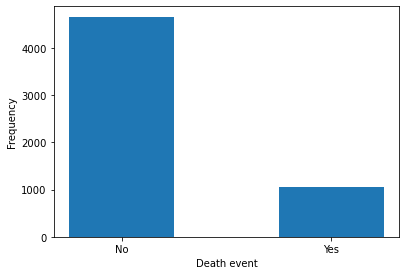

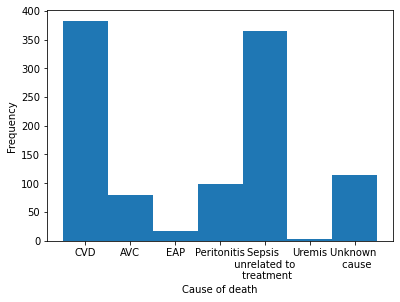

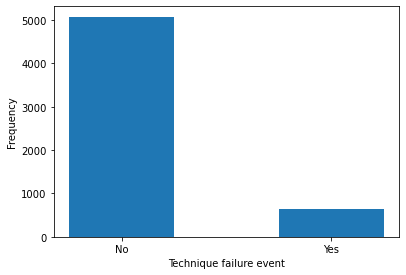

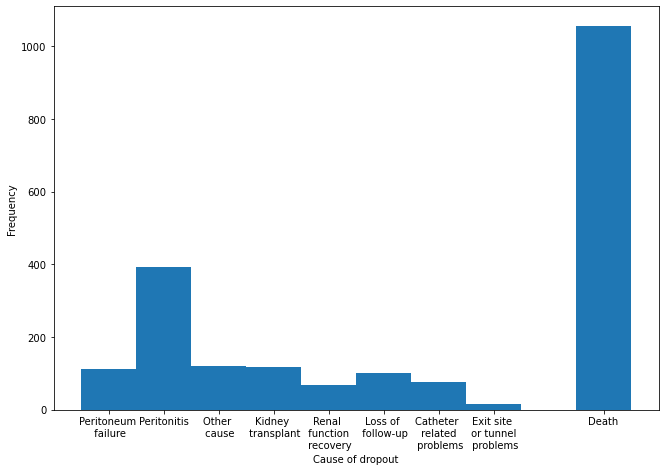

In [9]:
from matplotlib import pyplot as plt
import collections

fig = plt.figure()
ax = fig.add_axes([0, 0, 0.8, 0.8]) # main axes
Y['Deathevent'].plot.hist(bins=3,range=(-0.25, 1.25))
ax.set_xticks([0,1])
ax.set_xticklabels(['No','Yes'])
ax.set_xlabel('Death event')

death_event_collection = collections.Counter(Y['Deathevent'])
death_event_percentage = [(i, death_event_collection[i] / len(Y['Deathevent']) * 100.0) for i in death_event_collection]
print(death_event_percentage)


fig = plt.figure()
ax = fig.add_axes([0, 0, 0.8, 0.8]) # main axes
Y[Y['Deathevent']==1]["Causeofdeath"].plot.hist(bins=7,range=(0.5, 7.5))
ax.set_xticks([1,2,3,4,5,6,7])
ax.set_xticklabels(['CVD','AVC','EAP','Peritonitis','Sepsis \n unrelated to \n treatment','Uremis','Unknown \n cause'])
ax.set_xlabel('Cause of death')

causeofdeath_event_collection = collections.Counter(Y[Y['Deathevent']==1]["Causeofdeath"])
causeofdeath_event_percentage = [(i, causeofdeath_event_collection[i] / len(Y[Y['Deathevent']==1]["Causeofdeath"]) * 100.0) for i in causeofdeath_event_collection]
print(causeofdeath_event_percentage)

fig = plt.figure()
ax = fig.add_axes([0, 0, 0.8, 0.8]) # main axes
Y['TechniqueFailureevent'].plot.hist(bins=3,range=(-0.25, 1.25))
ax.set_xticks([0,1])
ax.set_xticklabels(['No','Yes'])
ax.set_xlabel('Technique failure event')

fig = plt.figure()
ax = fig.add_axes([0, 0, 1.4, 1.4]) # main axes
Y[Y['Dropoutsim1']==1]["Causeofdropout"].plot.hist(bins=10,range=(0.5, 10.5))
ax.set_xticks([1,2,3,4,5,6,7,8,10])
ax.set_xticklabels(['Peritoneum \n failure','Peritonitis','Other \n cause','Kidney \n transplant','Renal \n function \n recovery','Loss of \n follow-up','Catheter \n related \n problems','Exit site \n or tunnel \n problems','Death'])
ax.set_xlabel('Cause of dropout')

causeofdropout_collection = collections.Counter(Y[Y['Dropoutsim1']==1]["Causeofdropout"])
causeofdropout_percentage = [(i, causeofdropout_collection[i] / len(Y[Y['Dropoutsim1']==1]["Causeofdropout"]) * 100.0) for i in causeofdropout_collection]
print(causeofdropout_percentage)

# Predicting binary outcomes use 6-month average time-series data (using XGBoost):

* Deathevent   
* TechniqueFailureevent

X shape before feature selection:  (5707, 298)
X shape after feature selection:  (5707, 128)
Target: Deathevent, mean accuracy: 0.6586705366448149,
           mean F1 score: 0.3945220100384174, mean Recall: 0.5978494142895465, mean Precision: 0.294397874685671


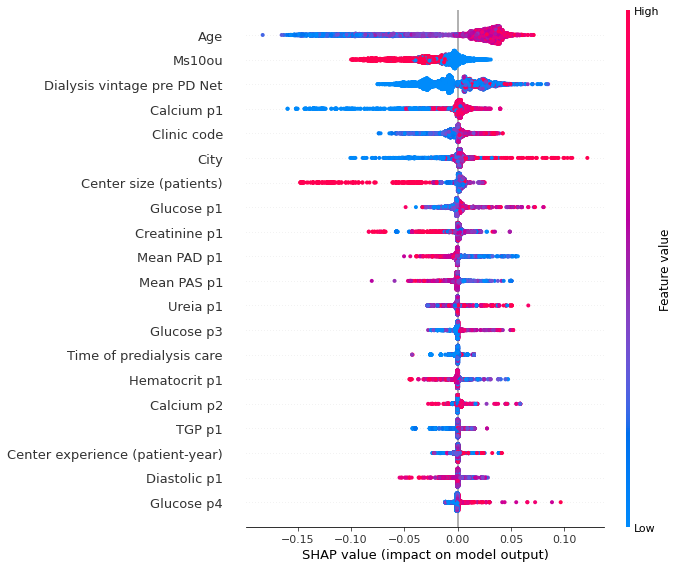

X shape before feature selection:  (5707, 298)
X shape after feature selection:  (5707, 128)
Target: TechniqueFailureevent, mean accuracy: 0.7136932453941683,
           mean F1 score: 0.18813558571119815, mean Recall: 0.29351222420989864, mean Precision: 0.1384347856697764


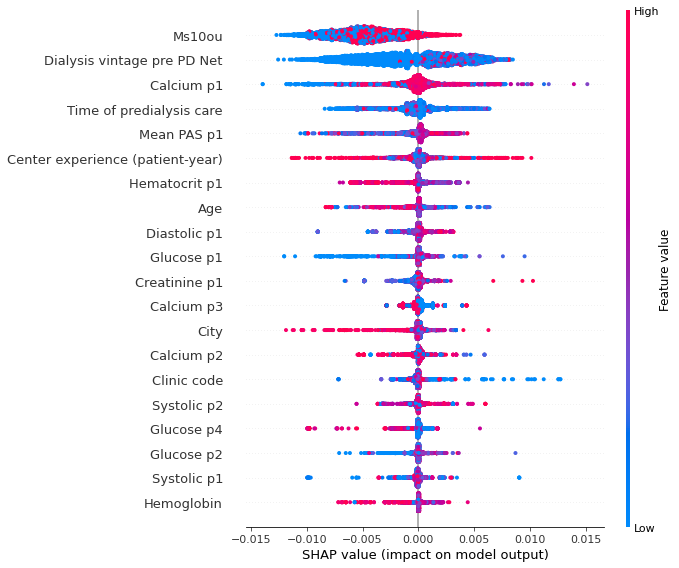

In [24]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["Deathevent","TechniqueFailureevent"]

models = []

# lr_list = [0.01, 0.001, 0.0001]
# md_list = [6, 7, 8]
# mcw_list = [3, 4, 5]

# for lr in lr_list:
#     for md in md_list:
#         for mcw in mcw_list:
#             print("lr : ", lr)
#             print("md : ", md)
#             print("mcw : ", mcw)
for target in targets:
    # full dataset
    y = Y[target].copy()
    X = df_totalaverage.copy()
    print("X shape before feature selection: ", X.shape)
    sorted_std = np.sort(X.std())[::-1]
    num_features = 128
    threshold = sorted_std[num_features]
    X = X.loc[:, X.std() > threshold]
    print("X shape after feature selection: ", X.shape)

    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0

    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y[train_index], y[test_index]

        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
#         X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
#         X_test = pd.DataFrame(X_test,columns=X.columns)


        # train XGBoost model
#                     model = xgboost.XGBClassifier(
#                         learning_rate = 0.05,
#                         max_depth = 8,
#                         min_child_weight = 5)
        if target == "Deathevent":
            lr = 0.001
            md = 6
            mcw = 4
        else:
            lr = 0.0001
            md = 7
            mcw = 5

        model = xgboost.XGBClassifier(learning_rate = lr, 
                                      max_depth = md, 
                                      min_child_weight = mcw)
        model.fit(X_train_sm, y_train_sm)
#         model.fit(X_train, y_train)

        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))


        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        # print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")


        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)

    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)

    #bringing back variable names    
    X_test = X.iloc[test_set,:]

    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)

    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
          mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

    shap.summary_plot(shap_values, X_test)


In [13]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

# Predicting binary outcomes use 6-month average time-series data (using neural networks):

* Deathevent   
* TechniqueFailureevent

In [28]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["Deathevent","TechniqueFailureevent"]

models = []

for target in targets:
    # full dataset
    y = Y[target].copy()
    X = df_totalaverage.copy()
    
    # apply feature selection on data
    print("X shape before feature selection: ", X.shape)
    sorted_std = np.sort(X.std())[::-1]
    num_features = 16
    threshold = sorted_std[num_features]
    X = X.loc[:, X.std() > threshold]
    print("X shape after feature selection: ", X.shape)
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
#         X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
        
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])
        
        if target == "Deathevent":
            num_epochs = 100
        else:
            num_epochs = 50
        
        history = model.fit(
            X_train_sm,
            y_train_sm,
            epochs=num_epochs,
            verbose=0
        )
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

X shape before feature selection:  (5707, 294)
X shape after feature selection:  (5707, 16)
F1 score: 0.3218645948945616, Recall: 0.6839622641509434, Precision: 0.2104499274310595
F1 score: 0.23057644110275688, Recall: 0.2169811320754717, Precision: 0.24598930481283424
F1 score: 0.36058700209643607, Recall: 0.8151658767772512, Precision: 0.23149394347240915
F1 score: 0.3434650455927052, Recall: 0.5355450236966824, Precision: 0.25279642058165547
F1 score: 0.15770609318996415, Recall: 0.10426540284360189, Precision: 0.3235294117647059
Target: Deathevent, mean accuracy: 0.6153906841173826,
         mean F1 score: 0.32909896919313975, mean Recall: 0.4711839399087901, mean Precision: 0.25285180161253284
X shape before feature selection:  (5707, 294)
X shape after feature selection:  (5707, 16)
F1 score: 0.16962524654832348, Recall: 0.33076923076923076, Precision: 0.11405835543766578
F1 score: 0.20211161387631973, Recall: 0.5153846153846153, Precision: 0.12570356472795496
F1 score: 0.1538461

# Predicting binary outcomes use 6-month average time-series data (using Dummy Classifier):

* Deathevent   
* TechniqueFailureevent

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["Deathevent","TechniqueFailureevent"]

models = []

for target in targets:
    # full dataset
    y = Y[target].copy()
    X = df_totalaverage.copy()
#     print("X shape before feature selection: ", X.shape)
    
#     # apply feature selection on data
#     # remove constant columns
#     constant_indices = [12, 13, 68, 81, 94, 120, 146, 159, 172, 185, 198, 211, 224, 237, 250, 263, 276]
#     constant_indices.reverse()
#     for idx in constant_indices:
#         X = X.drop(X.columns[idx], axis=1)
#     X = SelectKBest(f_classif, k=32).fit_transform(X, y)
#     print("X shape after feature selection: ", X.shape)
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
#         X_train, X_test = X[train_index,:], X[test_index,:]
        y_train, y_test = y[train_index], y[test_index]
        
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
        
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train tensorflow neural networks model
        model = DummyClassifier(strategy="stratified")
        model.fit(X_train_sm, y_train_sm)
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.2805194805194805, Recall: 0.5094339622641509, Precision: 0.1935483870967742
F1 score: 0.2901960784313726, Recall: 0.5235849056603774, Precision: 0.2007233273056058
F1 score: 0.2887139107611549, Recall: 0.5213270142180095, Precision: 0.1996370235934664
F1 score: 0.26052631578947366, Recall: 0.46919431279620855, Precision: 0.18032786885245902
F1 score: 0.26804123711340205, Recall: 0.4928909952606635, Precision: 0.184070796460177
Target: Deathevent, mean accuracy: 0.5148046617785426,
         mean F1 score: 0.2776053017617013, mean Recall: 0.5032862380398819, mean Precision: 0.19166148066169647
F1 score: 0.16541353383458648, Recall: 0.4230769230769231, Precision: 0.102803738317757
F1 score: 0.17027417027417027, Recall: 0.45384615384615384, Precision: 0.10479573712255773
F1 score: 0.18289085545722714, Recall: 0.4806201550387597, Precision: 0.11293260473588343
F1 score: 0.18508287292817677, Recall: 0.5193798449612403, Precision: 0.11260504201680673
F1 score: 0.15160349854227403,

# Predicting multiclass outcomes (using XGBoost):

* Causeofdeath   
* Causeofdropout

The least populated class in y has only 2 members, which is less than n_splits=5.


Target: Causeofdeath, mean accuracy: 0.37088884914602527,
         mean F1 score: 0.37088884914602527, mean Recall: 0.37088884914602527, mean Precision: 0.37088884914602527


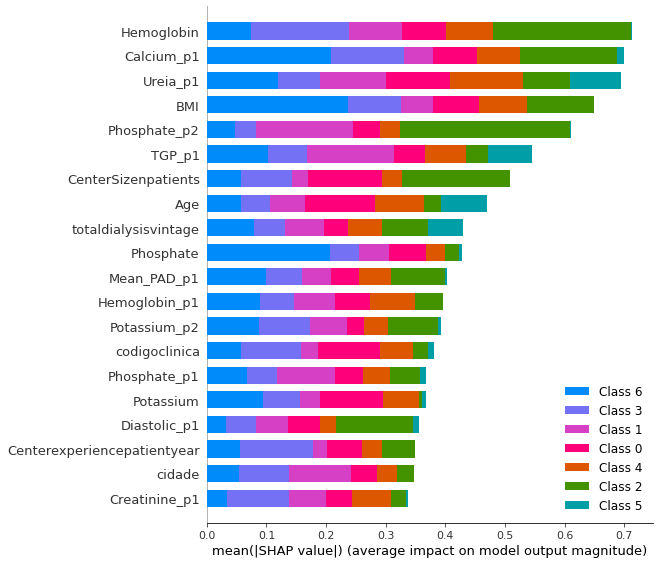

Target: Causeofdropout, mean accuracy: 0.52643574131973,
         mean F1 score: 0.52643574131973, mean Recall: 0.52643574131973, mean Precision: 0.52643574131973


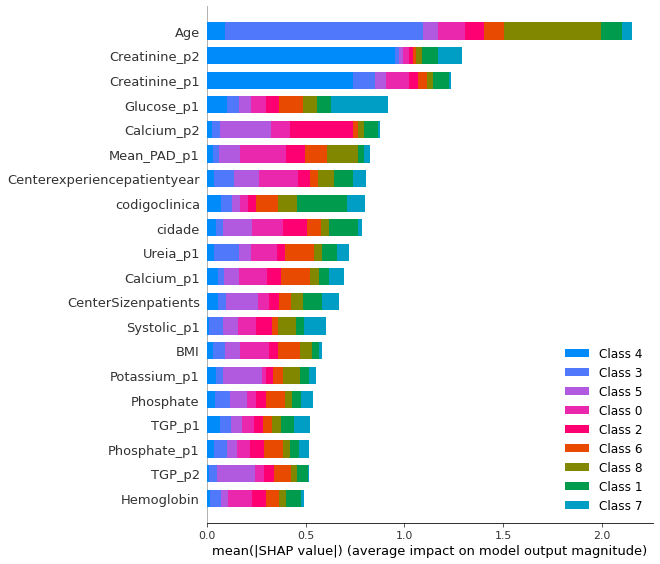

In [13]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

models = []

for target in targets:
    indicator = indicators[target]
    y = Y[Y[indicator]==1][target].copy()
    X = df_totalaverage[Y[indicator]==1].copy()
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=9,
            min_child_weight=4)
        model.fit(X_train, y_train)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_multiclass_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred, average='micro')
        recall = recall_score(y_test, y_pred, average='micro')
        precision = precision_score(y_test, y_pred, average='micro')
#         print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
#         print(f"F1 score: {f1score}")
#         shap.summary_plot(shap_values, X_test)
#         shap_values = np.array(shap_values)
#         print(shap_values.shape)
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=1)
    new_shap_values = list()
    for i in range(shap_values.shape[0]):
        new_shap_values.append(shap_values[i])
    
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_f1_score = np.mean(list_f1_score)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(new_shap_values, X_test)


In [20]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_multiclass_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: Causeofdeath, Class: 1.0, mean accuracy: 0.536466064562282,mean F1 score: 0.3766845482398586,
             mean Recall: 0.38752563226247433, mean Precision: 0.3667889231343981


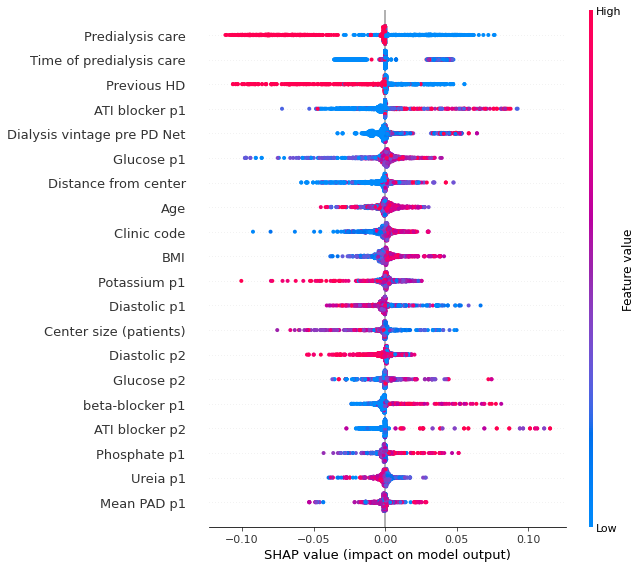

Target: Causeofdeath, Class: 2.0, mean accuracy: 0.8561387820799427,mean F1 score: 0.04511673477190718,
             mean Recall: 0.05166666666666666, mean Precision: 0.04157509157509157


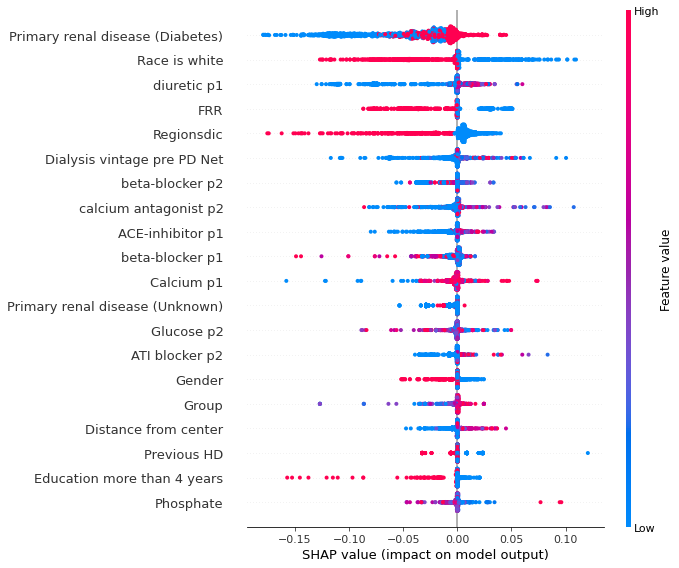

Target: Causeofdeath, Class: 3.0, mean accuracy: 0.9479656621657874,mean F1 score: 0.03636363636363636,
             mean Recall: 0.05, mean Precision: 0.02857142857142857


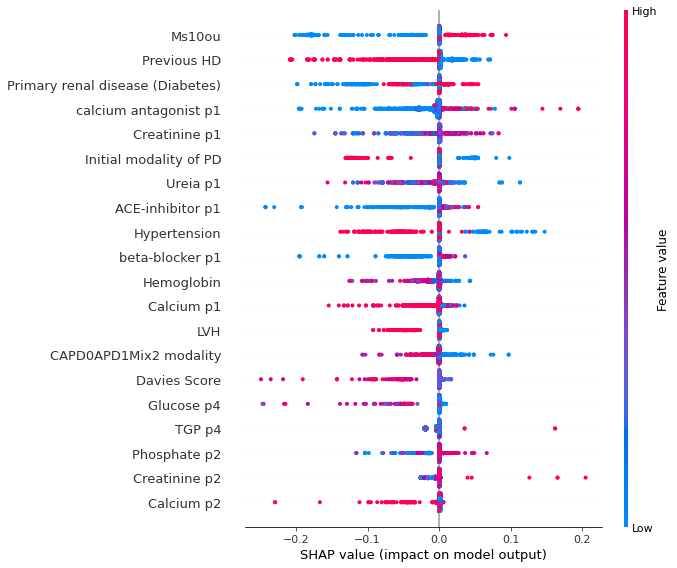

Target: Causeofdeath, Class: 4.0, mean accuracy: 0.8212554770633999,mean F1 score: 0.08592074592074592,
             mean Recall: 0.09157894736842105, mean Precision: 0.08464285714285714


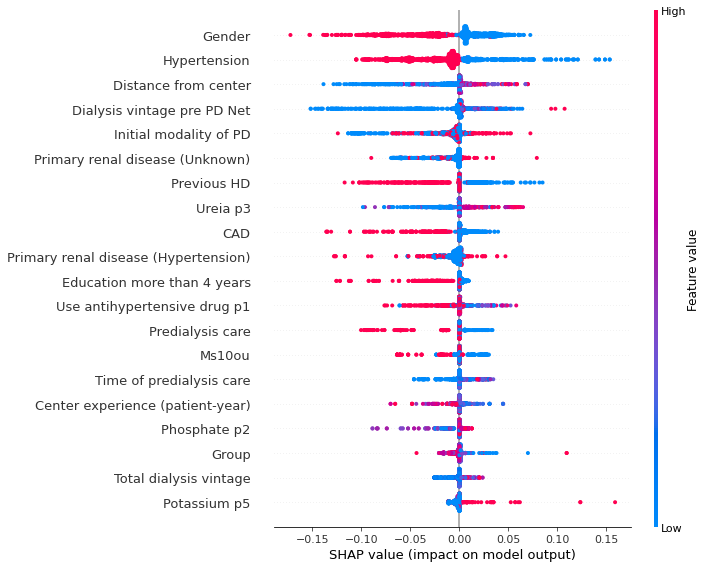

Target: Causeofdeath, Class: 5.0, mean accuracy: 0.5685996601985155,mean F1 score: 0.3376521852039726,
             mean Recall: 0.32328767123287666, mean Precision: 0.35715180107309796


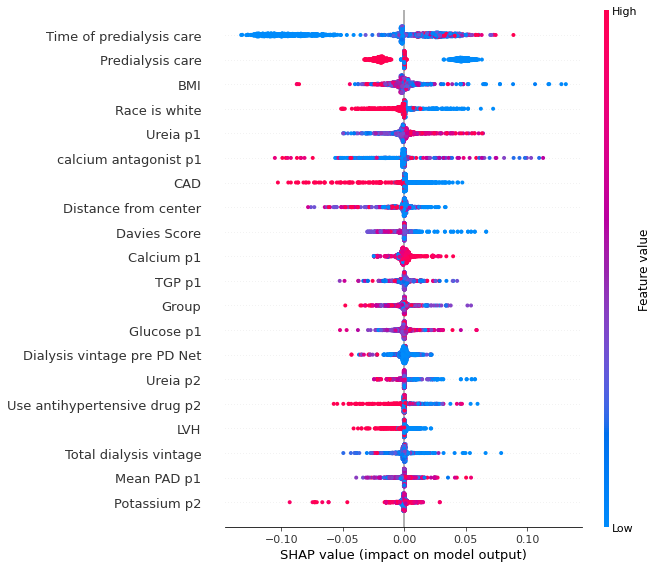

The least populated class in y has only 2 members, which is less than n_splits=5.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdeath, Class: 6.0, mean accuracy: 0.9981132075471699,mean F1 score: 0.0,
             mean Recall: 0.0, mean Precision: 0.0


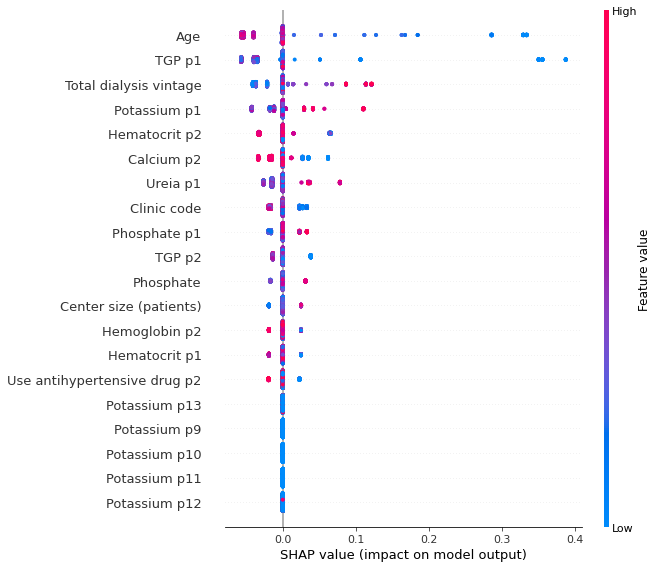

Target: Causeofdeath, Class: 7.0, mean accuracy: 0.8022713046588571,mean F1 score: 0.13114540471763317,
             mean Recall: 0.14031620553359683, mean Precision: 0.1264340381313816


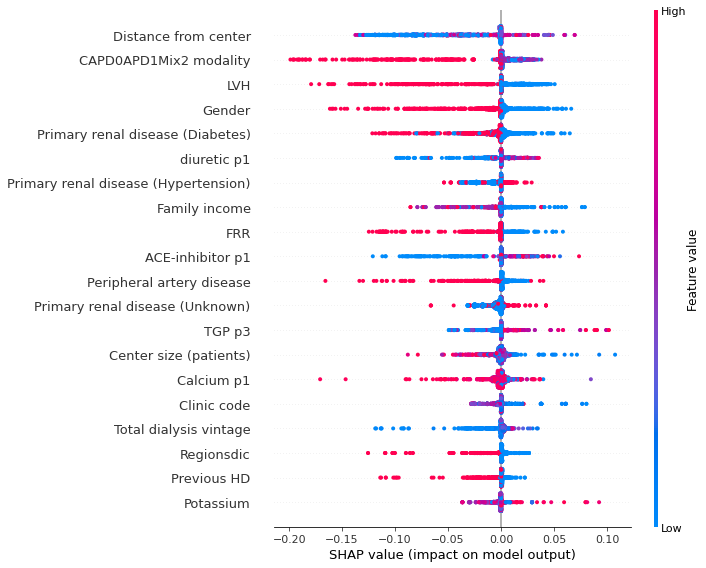

Target: Causeofdropout, Class: 1, mean accuracy: 0.890340628599638,mean F1 score: 0.11299579027937234,
             mean Recall: 0.11660079051383399, mean Precision: 0.11296691543750366


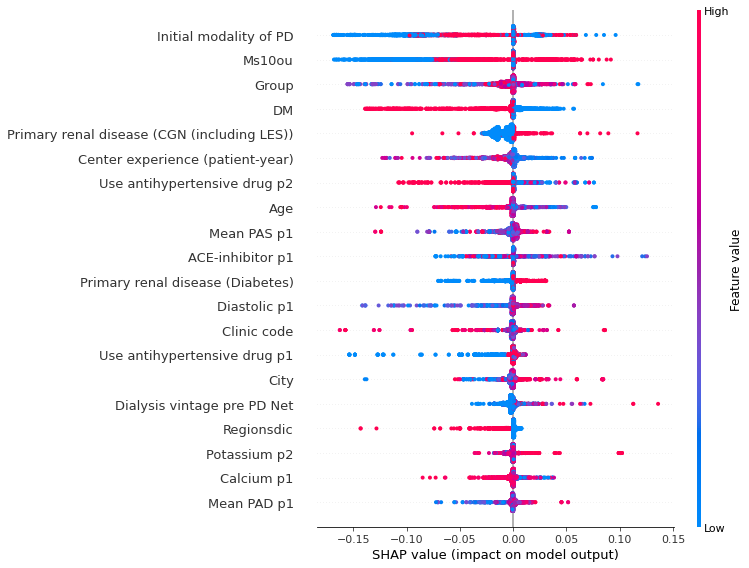

Target: Causeofdropout, Class: 2, mean accuracy: 0.7283093161569384,mean F1 score: 0.27136031878696726,
             mean Recall: 0.26202531645569616, mean Precision: 0.29062271062271067


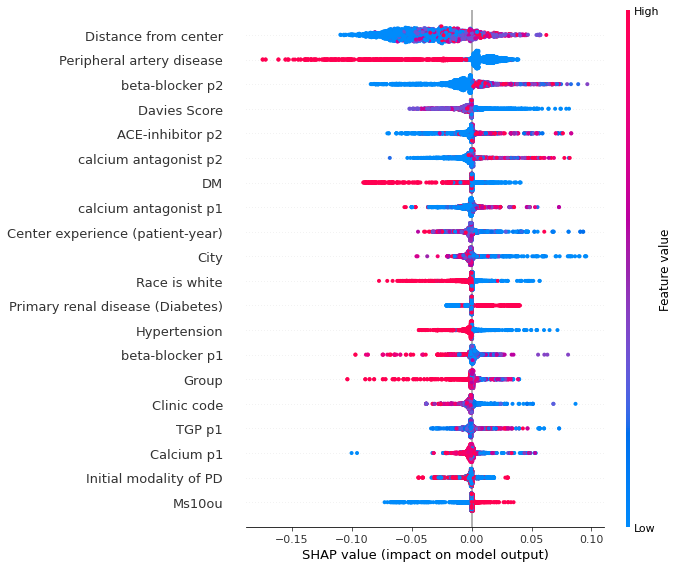

Target: Causeofdropout, Class: 3, mean accuracy: 0.8728507957403794,mean F1 score: 0.055470822281167106,
             mean Recall: 0.06633333333333333, mean Precision: 0.06414565826330532


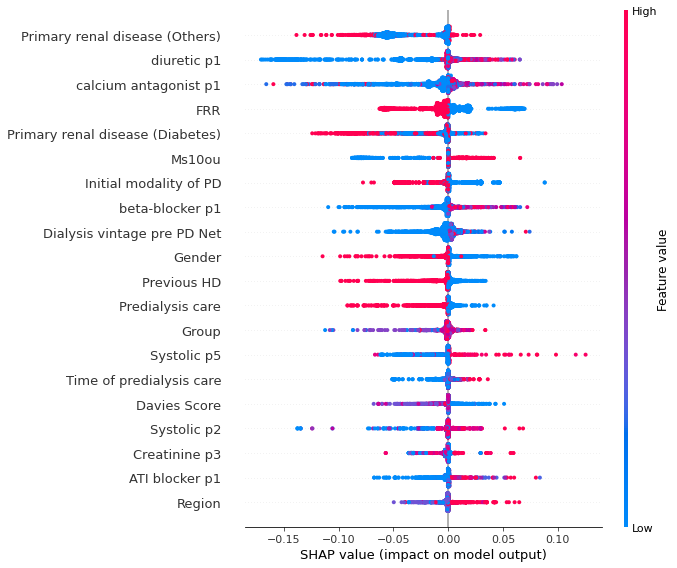

Target: Causeofdropout, Class: 4, mean accuracy: 0.8748242788970122,mean F1 score: 0.19262337567086743,
             mean Recall: 0.2666666666666667, mean Precision: 0.15188878223047042


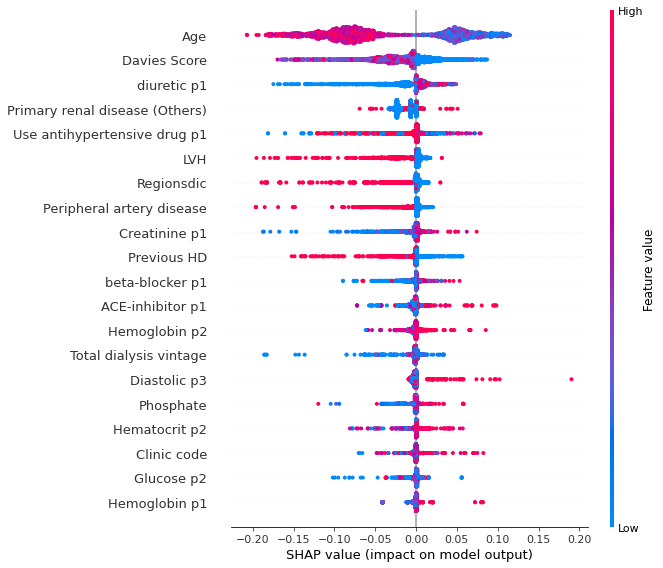

Target: Causeofdropout, Class: 5, mean accuracy: 0.904901384611768,mean F1 score: 0.14174228675136116,
             mean Recall: 0.23186813186813185, mean Precision: 0.10333333333333335


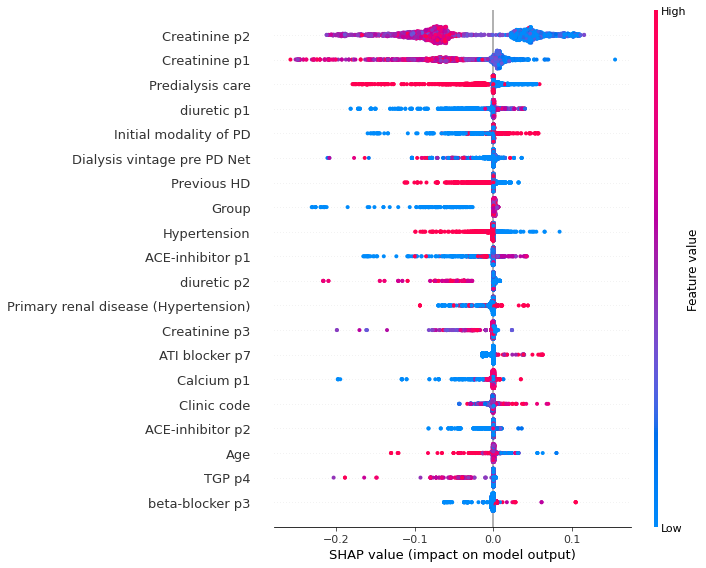

Target: Causeofdropout, Class: 6, mean accuracy: 0.885014927478314,mean F1 score: 0.1769812543858821,
             mean Recall: 0.24523809523809526, mean Precision: 0.14136021943806062


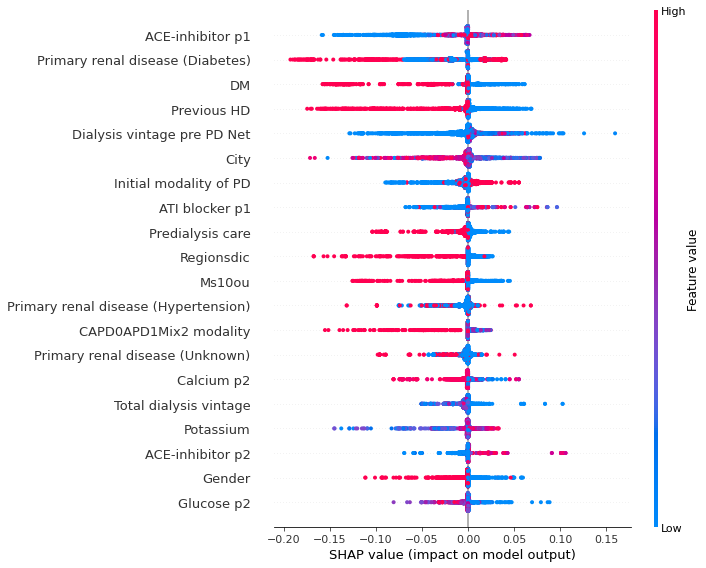

Target: Causeofdropout, Class: 7, mean accuracy: 0.9005359787489127,mean F1 score: 0.016,
             mean Recall: 0.026666666666666665, mean Precision: 0.011428571428571429


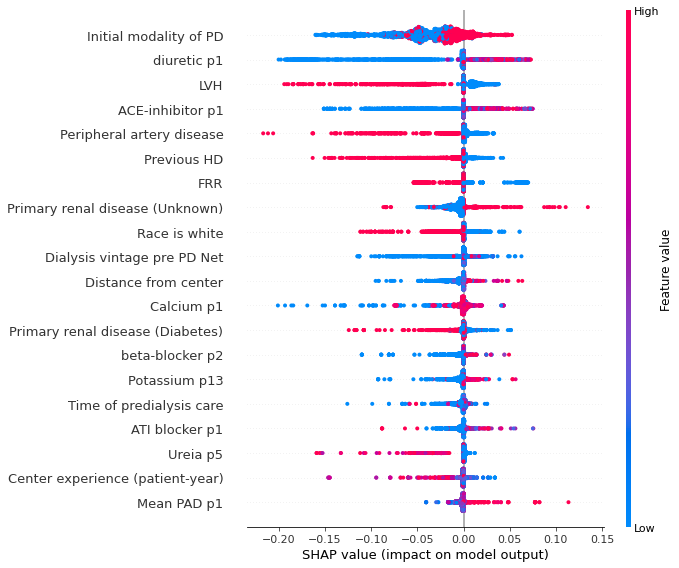

Target: Causeofdropout, Class: 8, mean accuracy: 0.9602082794612004,mean F1 score: 0.0,
             mean Recall: 0.0, mean Precision: 0.0


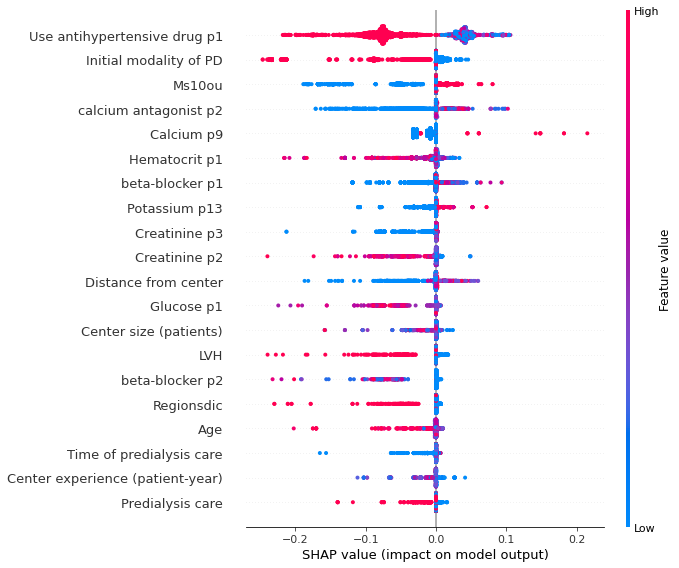

Target: Causeofdropout, Class: 10, mean accuracy: 0.6336714544300525,mean F1 score: 0.6388808831776351,
             mean Recall: 0.6319994634713404, mean Precision: 0.6462991863412031


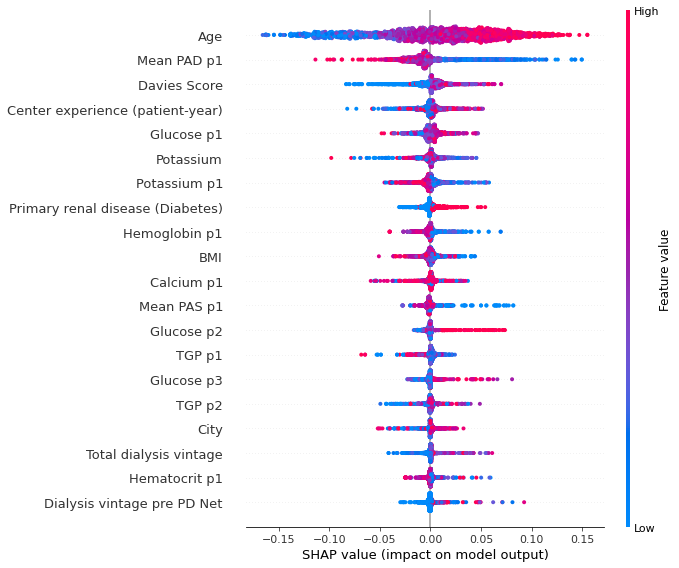

In [10]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

models = []
classnumlist = []

for target in targets:
    indicator = indicators[target]
    y = Y[Y[indicator]==1][target].copy()
    X = df_totalaverage[Y[indicator]==1].copy()
    
    set1 = set(y)
    classnumlist.append(set1)
    
    for classidx in set1:
        # Create binary classification labels
        y = np.array(y)
        ybi = np.zeros(y.shape)
        for i in range(len(y)):
            if y[i] == classidx:
                ybi[i] = 1
            else:
                ybi[i] = -1
        
        # apply k-fold cross validation
        k = 5
        kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

        list_shap_values = list()
        list_test_sets = list()
        list_normalised_accuracy = list()
        list_f1_score = list()
        list_recall = list()
        list_precision = list()
        
        j = 0

        for train_index, test_index in kf.split(X, ybi):
            X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
            y_train, y_test = ybi[train_index], ybi[test_index]
            X_train = pd.DataFrame(X_train,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)
            
            if ybi[np.where(ybi == 1)].shape[0] >= 3:

                sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
                X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

                X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
                X_test = pd.DataFrame(X_test,columns=X.columns)

                # train XGBoost model
                model = xgboost.XGBClassifier(
                    learning_rate =0.001,
                    max_depth=9,
                    min_child_weight=4)
                model.fit(X_train_sm, y_train_sm)
            
            else:
                model = xgboost.XGBClassifier(
                    learning_rate =0.1,
                    max_depth=9,
                    min_child_weight=4)
                model.fit(X_train, y_train)

            # use saved model
#             filename = 'models/' + target + '_class' + str(classidx) + '_fold'+ str(j) + '_binary_model.pkl'
#             j = j + 1
#             model = pickle.load(open(filename, 'rb'))


            # explaining model
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test)
            y_pred = model.predict(X_test)
            normalised_accuracy = accuracy_score(y_test, y_pred)
            f1score = f1_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
#             print(f"F1 score: {f1score}")
#             shap.summary_plot(shap_values, X_test)
#             print(shap_values.shape)

            # for each iteration we save the test_set index and the shap_values
            list_shap_values.append(shap_values)
            list_test_sets.append(test_index)
            list_normalised_accuracy.append(normalised_accuracy)
            list_f1_score.append(f1score)
            list_recall.append(recall)
            list_precision.append(precision)
            models.append(model)

        #combining results from all iterations
        test_set = list_test_sets[0]
        shap_values = np.array(list_shap_values[0])
        for i in range(0,len(list_test_sets)):
            test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
            shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)

        #bringing back variable names    
        X_test = X.iloc[test_set,:]

        mean_normalised_accuracy = np.mean(list_normalised_accuracy)
        mean_f1_score = np.mean(list_f1_score)
        mean_recall = np.mean(list_recall)
        mean_precision = np.mean(list_precision)
        
        print(f"Target: {target}, Class: {classidx}, mean accuracy: {mean_normalised_accuracy},mean F1 score: {mean_f1_score},\n \
            mean Recall: {mean_recall}, mean Precision: {mean_precision}")

        shap.summary_plot(shap_values, X_test)

In [29]:
# Save predictive models
import pickle

i = 0
j = 0
model = None
for target in targets:
    classnum = classnumlist[i]
    for classidx in classnum:
        for ik in range(k):         
            filename = 'models/' + target + '_class' + str(classidx) + '_fold' + str(ik) + '_binary_model.pkl'
            model = models[j]
            with open(filename, 'wb') as file:  
                pickle.dump(model, file)
            j = j + 1
    i = i + 1

# Predicting multiclass outcomes (using neural networks):

* Causeofdeath   
* Causeofdropout

In [37]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

models = []
classnumlist = []

for target in targets:
    indicator = indicators[target]
    y = Y[Y[indicator]==1][target].copy()
    X = df_totalaverage[Y[indicator]==1].copy()
    
    set1 = set(y)
    classnumlist.append(set1)
    
    for classidx in set1:
        # Create binary classification labels
        y = np.array(y)
        ybi = np.zeros(y.shape)
        for i in range(len(y)):
            if y[i] == classidx:
                ybi[i] = 1
            else:
                ybi[i] = 0
        
        # apply k-fold cross validation
        k = 5
        kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

        list_shap_values = list()
        list_test_sets = list()
        list_normalised_accuracy = list()
        list_f1_score = list()
        list_recall = list()
        list_precision = list()
        
        j = 0

        for train_index, test_index in kf.split(X, ybi):
            X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
            y_train, y_test = ybi[train_index], ybi[test_index]
            X_train = pd.DataFrame(X_train,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)
            
            if ybi[np.where(ybi == 1)].shape[0] >= 3:

                sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
                X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

                X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
                X_test = pd.DataFrame(X_test,columns=X.columns)

                model = keras.Sequential([
                        keras.layers.Dense(units=32, activation='relu',dtype='float64'),
                        keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
                    ])
        
                model.compile(optimizer='adam', 
                      loss=tf.losses.BinaryCrossentropy(from_logits=False),
                      metrics=['accuracy'])
                history = model.fit(
                    X_train_sm,
                    y_train_sm,
                    epochs=100,
                    verbose=0)                                    
            
            else:
                model = keras.Sequential([
                        keras.layers.Dense(units=32, activation='relu',dtype='float64'),
                        keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
                    ])
        
                model.compile(optimizer='adam', 
                      loss=tf.losses.BinaryCrossentropy(from_logits=False),
                      metrics=['accuracy'])
                history = model.fit(
                    X_train,
                    y_train,
                    epochs=100,
                    verbose=0) 

            # explaining model
            predictions = model.predict(X_test)
            y_pred = list()
            for i in range(len(predictions)):
                if predictions[i] >= 0.5:
                    y_pred.append(1)
                else:
                    y_pred.append(0)
            y_pred = np.array(y_pred)
            normalised_accuracy = accuracy_score(y_test, y_pred)
            f1score = f1_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)

            # for each iteration we save the test_set index and the shap_values
            list_normalised_accuracy.append(normalised_accuracy)
            list_f1_score.append(f1score)
            list_recall.append(recall)
            list_precision.append(precision)
            models.append(model)

        mean_normalised_accuracy = np.mean(list_normalised_accuracy)
        mean_f1_score = np.mean(list_f1_score)
        mean_recall = np.mean(list_recall)
        mean_precision = np.mean(list_precision)
        
        print(f"Target: {target}, Class: {classidx}, mean accuracy: {mean_normalised_accuracy},mean F1 score: {mean_f1_score},\n \
            mean Recall: {mean_recall}, mean Precision: {mean_precision}")

Target: Causeofdeath, Class: 1.0, mean accuracy: 0.5694894035589735,mean F1 score: 0.3740256479858698,
             mean Recall: 0.3697197539302802, mean Precision: 0.4055607763023493
Target: Causeofdeath, Class: 2.0, mean accuracy: 0.736032370562461,mean F1 score: 0.08642495670966616,
             mean Recall: 0.1625, mean Precision: 0.06215295815295815
Target: Causeofdeath, Class: 3.0, mean accuracy: 0.9261781275149781,mean F1 score: 0.04566596194503171,
             mean Recall: 0.11666666666666665, mean Precision: 0.03357142857142857
Target: Causeofdeath, Class: 4.0, mean accuracy: 0.7020030403290709,mean F1 score: 0.1532430063190991,
             mean Recall: 0.26736842105263153, mean Precision: 0.11849721706864562
Target: Causeofdeath, Class: 5.0, mean accuracy: 0.48535723866583214,mean F1 score: 0.38641637012916,
             mean Recall: 0.4958904109589041, mean Precision: 0.3318008101259579


The least populated class in y has only 2 members, which is less than n_splits=5.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


Target: Causeofdeath, Class: 6.0, mean accuracy: 0.9924304748278636,mean F1 score: 0.0,
             mean Recall: 0.0, mean Precision: 0.0
Target: Causeofdeath, Class: 7.0, mean accuracy: 0.7557855673790576,mean F1 score: 0.12784016403213885,
             mean Recall: 0.2193675889328063, mean Precision: 0.10522510897706312
Target: Causeofdropout, Class: 1, mean accuracy: 0.8117456921883448,mean F1 score: 0.14896695709961752,
             mean Recall: 0.3292490118577075, mean Precision: 0.11224486033768748
Target: Causeofdropout, Class: 2, mean accuracy: 0.6496509085780108,mean F1 score: 0.23950954361342475,
             mean Recall: 0.3215189873417722, mean Precision: 0.22865754030766178
Target: Causeofdropout, Class: 3, mean accuracy: 0.8068760431603941,mean F1 score: 0.126412574788842,
             mean Recall: 0.26366666666666666, mean Precision: 0.08842525055361955
Target: Causeofdropout, Class: 4, mean accuracy: 0.8767413432379699,mean F1 score: 0.20801472007145766,
             m

# Predicting binary outcomes for events in different years (using XGBoost):


* death_event_1y
* Followup1y
* Tech_event_1y
* death_event_2y
* Followup2y
* Tech_event_2y
* death_event_3y
* Followup3y
* Tech_event_3y

In [11]:
baseline = df[unique_cols].copy()

numofpatient = baseline.shape[0]

# labelnames = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
#               'Hemoglobin', 'Hematocrit','Volume_Total', 'N_AH_', 'Systolic', 'Diastolic',
#              'PAS', 'PAD', 'Uso_de_anti_hipert', 'inibidor']

# remove Volume_Total and N_AH_
labelnames = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit', 'Systolic', 'Diastolic',
             'PAS', 'PAD', 'Use antihypertensive drug', 'ACE-inhibitor', 'ATI blocker', 'beta-blocker',
              'calcium antagonist', 'diuretic']

dfs = [df[unique_cols], df[unique_cols], df[unique_cols]]
maxmonths = [6, 18, 30]


for year in range(3):
    dfs[year] = dfs[year].rename(columns={"codigoclinica": "Clinic code",\
                                                  "ModalidadeCAPD0APD1Mix2": "CAPD0APD1Mix2 modality",\
                                                  "CenterSizenpatients": "Center size (patients)",\
                                                  "ModalidadeDPInicial": "Initial modality of PD",\
                                                  "IncidentinPD": "Incident in PD",\
                                                  "PrevalentinPDNet": "Prevalent in PD Net",\
                                                  "DialysisvintageprePDNet": "Dialysis vintage pre PD Net",\
                                                  "totaldialysisvintage": "Total dialysis vintage",\
                                                  "Primaryrenaldisease": "Primary renal disease",\
                                                  "PreviousHD": "Previous HD",\
                                                  "Previoustx": "Previous tx",\
                                                  "DaviesScore": "Davies Score",\
                                                  "Peripheralarterydisease": "Peripheral artery disease",\
                                                  "Familyincome": "Family income",\
                                                  "Distancefromcenter": "Distance from center",\
                                                  "predialysiscare": "Predialysis care",\
                                                  "timeofpredialysiscare": "Time of predialysis care",\
                                                  "Racedicwhite": "Race is white",\
                                                  "Educationdic4y": "Education more than 4 years",\
                                                  "Centerexperiencepatientyear": "Center experience (patient-year)",\
                                                  "cidade": "City"})
    
    
    for labelname in labelnames:
        for patient_idx in range(numofpatient):
            # compute the max index of month including nonzero data
            maxmonth = maxmonths[year]
            maxname = labelname + str(maxmonth)
            temp = df.at[patient_idx, maxname]
            while temp == 0 and maxmonth >= maxmonths[year]-5:
                maxmonth = maxmonth - 1
                maxname = labelname + str(maxmonth)
                if maxmonth >= maxmonths[year]-5:
                    temp = df.at[patient_idx, maxname]

            # compute the average of 3 months
            mean_months = 0
            if maxmonth >= maxmonths[year]-3:
                for i in range(maxmonth-2, maxmonth+1):
                    name = labelname + str(i)
                    mean_months = mean_months + df.at[patient_idx, name]
                mean_months = mean_months/3
            elif maxmonth == maxmonths[year]-4:
                for i in range(maxmonth-1, maxmonth+1):
                    name = labelname + str(i)
                    mean_months = mean_months + df.at[patient_idx, name]
                mean_months = mean_months/2
            elif maxmonth == maxmonths[year]-5:
                name = labelname + str(maxmonth)
                mean_months = df.at[patient_idx, name]
            else:
                mean_months = 0
            yearname = str(year+1)+'Y'
            name = labelname + ' mean months ' + yearname
            dfs[year].loc[patient_idx, name] = mean_months


extra_1y = ['Mean_PAS_1T', 'Mean_PAD_1T']
extra_2y = ['Mean_PAS_3T', 'Mean_PAD_3T']
extra_3y = ['Mean_PAS_5T', 'Mean_PAD_5T']
extras = [extra_1y, extra_2y, extra_3y]

for year in range(3):
    for index in extras[year]:
            new_name = index[0:4] + ' ' + index[5:8] + ' ' + index[9:]
            dfs[year].loc[:,new_name] = df[index]    
    dfs[year] = dfs[year].fillna(0)
    dfs[year].drop(columns = ['Total dialysis vintage'] , inplace=True)
        
display(dfs[1])

,Hemoglobin,Potassium,Phosphate,FRR,Clinic code,CAPD0APD1Mix2 modality,Center size (patients),Initial modality of PD,Age,BMI,...,PAS mean months 2Y,PAD mean months 2Y,Use antihypertensive drug mean months 2Y,ACE-inhibitor mean months 2Y,ATI blocker mean months 2Y,beta-blocker mean months 2Y,calcium antagonist mean months 2Y,diuretic mean months 2Y,Mean PAS 3T,Mean PAD 3T
0,12.933333,4.433333,5.300000,0,1,0,128,0.0,71.2,20.7,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,14.000000,3.766667,5.933333,0,1,0,128,0.0,23.3,28.3,...,135.666667,73.0,0.0,0.0,0.0,0.0,0.000000,0.0,136.000000,82.000000
2,11.833333,4.366667,6.100000,1,1,1,128,1.0,49.2,31.5,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,147.000000,80.000000
3,10.066667,4.733333,5.533333,1,1,0,128,0.0,48.3,27.1,...,174.666667,84.0,1.0,1.0,0.0,0.0,0.333333,0.0,169.333333,99.000000
4,11.933333,4.033333,4.066667,0,1,2,128,0.0,93.7,23.1,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,129.333333,72.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,8.400000,5.500000,4.700000,1,347,1,66,1.0,31.8,22.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,120.000000,80.000000
5703,9.700000,4.300000,3.233333,1,347,1,66,1.0,57.0,21.5,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
5704,10.466667,4.433333,4.466667,1,347,1,66,1.0,84.0,23.5,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
5705,11.766667,4.533333,3.566667,1,347,1,66,1.0,54.2,35.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


Target: death_event_1y, mean accuracy: 0.9032771511148698, mean F1 score: 0.1397128574921043,
           mean Recall: 0.08783552255853798, mean Precision: 0.3412783751493429


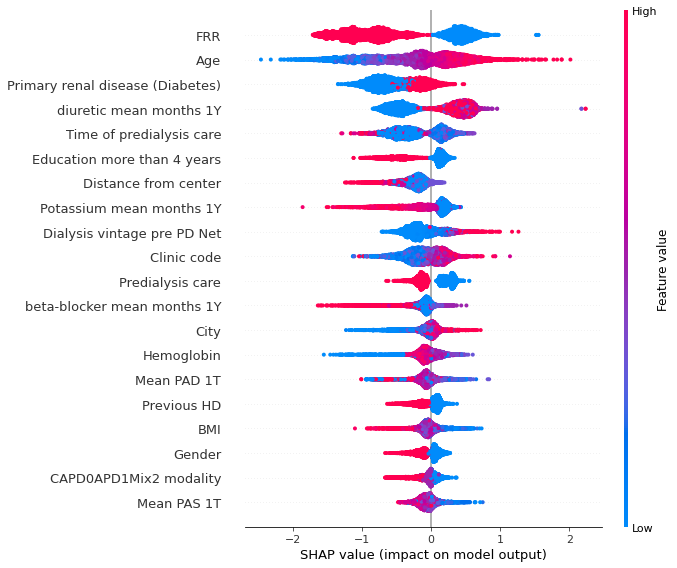

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup1y, mean accuracy: 0.6700496231069006, mean F1 score: 0.7336683392226153,
           mean Recall: 0.7867664505449028, mean Precision: 0.6872841900175672


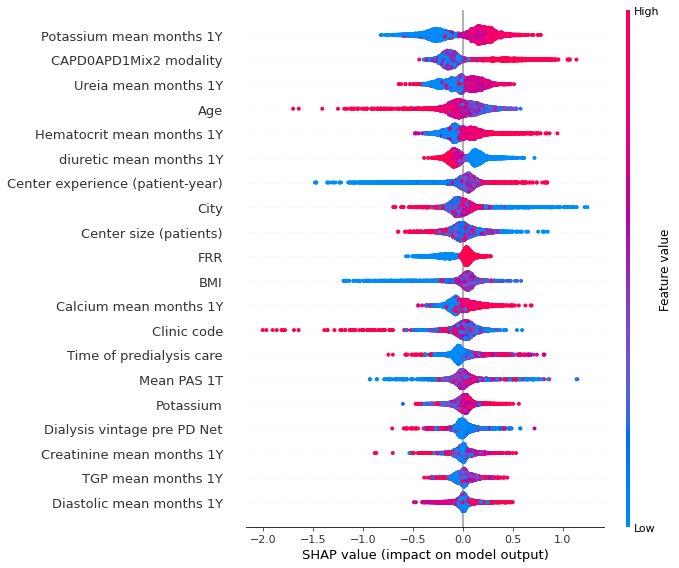

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
invalid value encountered in double_scalars


Target: Tech_event_1y, mean accuracy: 0.948835553045152, mean F1 score: nan,
           mean Recall: 0.0, mean Precision: 0.0


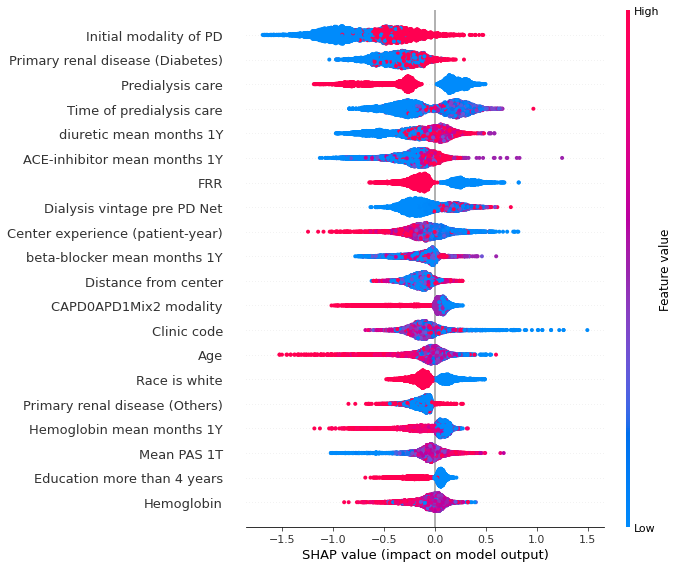

In [12]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_1y","Followup1y","Tech_event_1y"]

models = []

for target in targets:
    # full dataset
    database = dfs[0].copy()
    X = database

    if target == "Followup1y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 12:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
        y_followup1y = y
    else:
        y = Y[target]   
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        if target != "Followup1y":
            # apply data balancing
            sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
            X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

            #comment if apply feature selection
            X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)

            # train XGBoost model
            model = xgboost.XGBClassifier(
                learning_rate =0.1,
                max_depth=8,
                min_child_weight=3)
            model.fit(X_train_sm, y_train_sm)
        
        else:
            # train XGBoost model
            model = xgboost.XGBClassifier(
                learning_rate =0.1,
                max_depth=8,
                min_child_weight=3)
            model.fit(X_train, y_train)
            
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean F1 score: {mean_f1_score},\n \
          mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

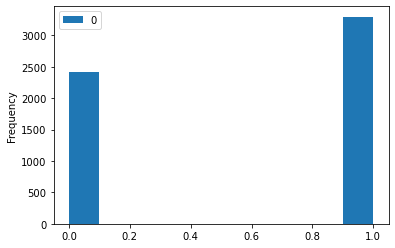

In [11]:
from matplotlib import pyplot as plt

plt.figure()
y_followup1y.plot.hist()

In [17]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: death_event_2y, mean accuracy: 0.9368623676612128, mean F1 score: 0.06828896178198184,
           mean Recall: 0.039344262295081964, mean Precision: 0.25835497835497834


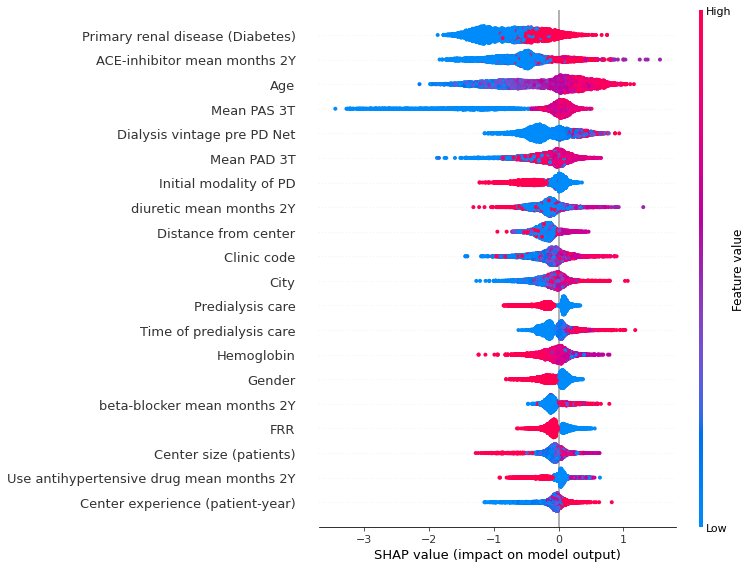

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup2y, mean accuracy: 0.7249027452062353, mean F1 score: 0.7232802082668809,
           mean Recall: 0.7466936491875483, mean Precision: 0.7012904374377811


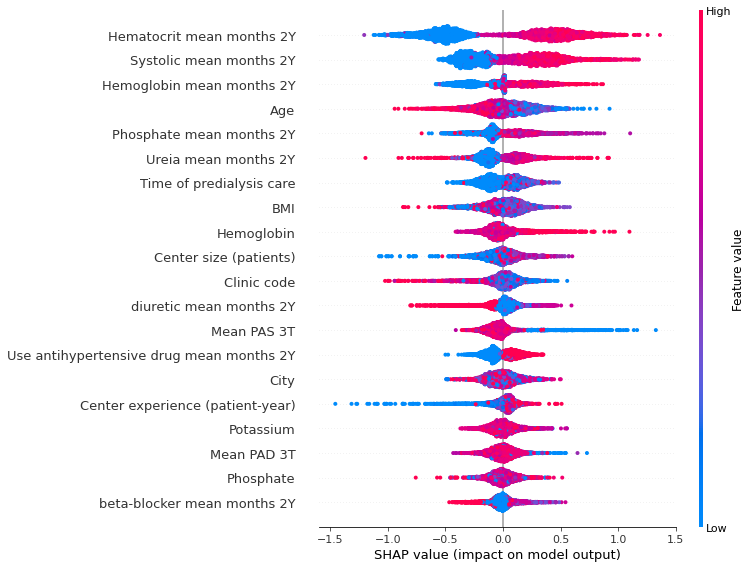

Target: Tech_event_2y, mean accuracy: 0.9602506433812629, mean F1 score: 0.018393414703377804,
           mean Recall: 0.009878048780487805, mean Precision: 0.13333333333333333


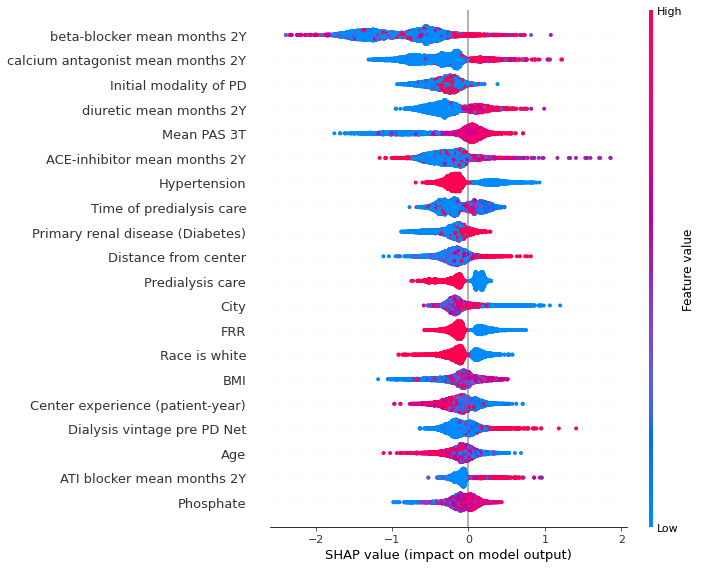

In [13]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_2y","Followup2y","Tech_event_2y"]

models = []

for target in targets:
    # full dataset
    X = dfs[1].copy()
    if target == "death_event_2y":
        indexNames = df[df["death_event_1y"] == 1].index
    elif target == "Tech_event_2y":
        indexNames = df[df["Tech_event_1y"] == 1].index
    else:
        indexNames = df[df["Followup1y"] < 12].index
    X.drop(indexNames , inplace=True) 
    
    if target == "Followup2y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 24:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
        y_followup2y = y
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True) 
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=8,
            min_child_weight=3)
        model.fit(X_train_sm, y_train_sm)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean F1 score: {mean_f1_score},\n \
          mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

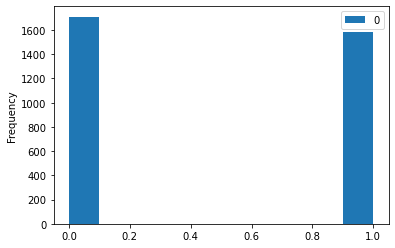

In [14]:
from matplotlib import pyplot as plt

plt.figure()
y_followup2y.plot.hist()

In [19]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

Target: death_event_3y, mean accuracy: 0.9621676891615542, mean F1 score: 0.059476627836445,
           mean Recall: 0.0389247311827957, mean Precision: 0.126007326007326


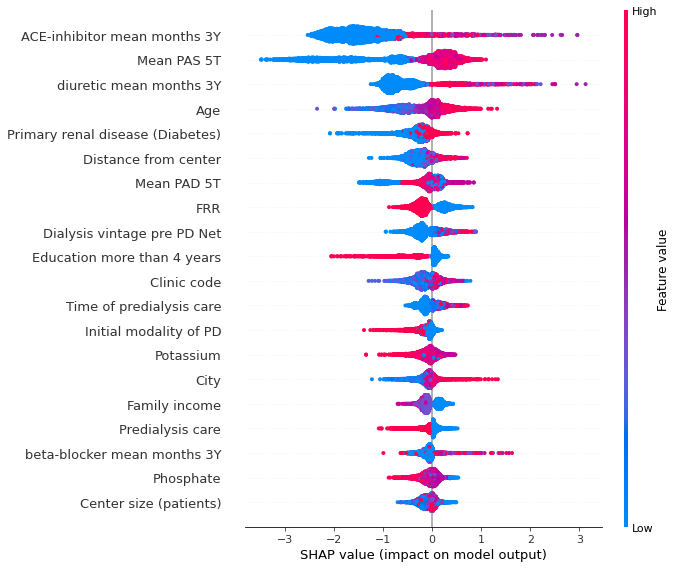

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Target: Followup3y, mean accuracy: 0.6956530365256036, mean F1 score: 0.6574407638346129,
           mean Recall: 0.6819281045751635, mean Precision: 0.6346510922504207


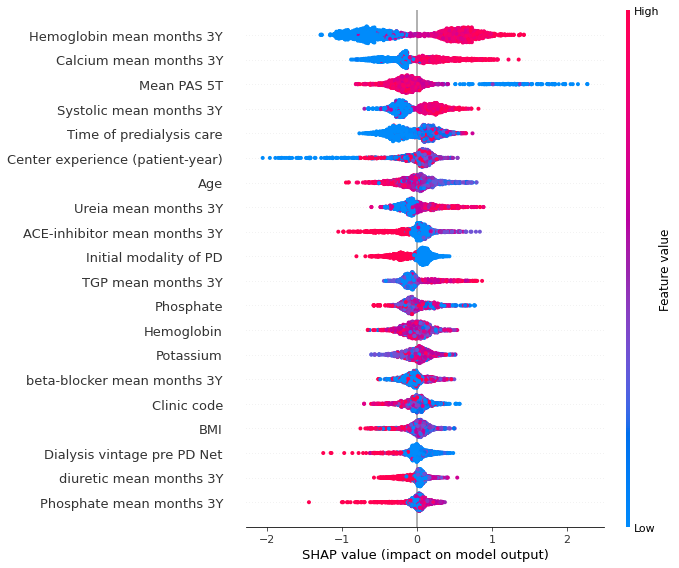

invalid value encountered in double_scalars


Target: Tech_event_3y, mean accuracy: 0.978780673544188, mean F1 score: nan,
           mean Recall: 0.0, mean Precision: 0.0


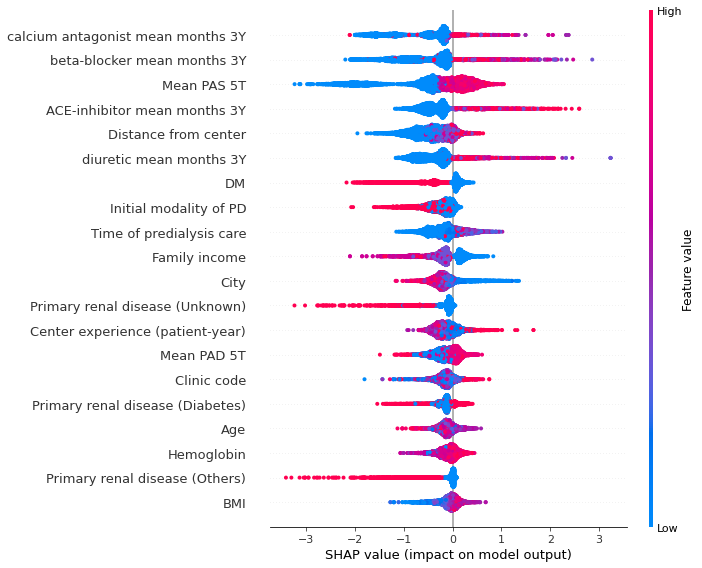

In [14]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_3y","Followup3y","Tech_event_3y"]

models = []

for target in targets:
    # full dataset
    X = dfs[2].copy()
    if target == "death_event_3y":
        indexNames = df[(df["death_event_1y"] == 1) | (df["death_event_2y"] == 1)].index
    elif target == "Tech_event_3y":
        indexNames = df[(df["Tech_event_1y"] == 1) | (df["Tech_event_2y"] == 1)].index
    else:
        indexNames = df[(df["Followup2y"] < 24)].index
#         print(len(indexNames))
    X.drop(indexNames , inplace=True)
    
    if target == "Followup3y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 36:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
        y_followup3y = y
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True)    
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train XGBoost model
        model = xgboost.XGBClassifier(
            learning_rate =0.1,
            max_depth=8,
            min_child_weight=3)
        model.fit(X_train_sm, y_train_sm)
        
        # use saved model
#         filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
#         j = j + 1
#         model = pickle.load(open(filename, 'rb'))
        
        
        # explaining model
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
#         print(f"F1 score: {f1score}")
        
        # for each iteration we save the test_set index and the shap_values
        list_shap_values.append(shap_values)
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    #combining results from all iterations
    test_set = list_test_sets[0]
    shap_values = np.array(list_shap_values[0])
    for i in range(0,len(list_test_sets)):
        test_set = np.concatenate((test_set,list_test_sets[i]),axis=0)
        shap_values = np.concatenate((shap_values,np.array(list_shap_values[i])),axis=0)
        
    #bringing back variable names    
    X_test = X.iloc[test_set,:]
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy}, mean F1 score: {mean_f1_score},\n \
          mean Recall: {mean_recall}, mean Precision: {mean_precision}")
    
    shap.summary_plot(shap_values, X_test)

In [21]:
# Save predictive models
import pickle

i = 0
model = None
for target in targets:
    for j in range(k):
        filename = 'models/' + target + '_fold'+ str(j) + '_binary_model.pkl'
        model = models[i * k + j]
        with open(filename, 'wb') as file:  
            pickle.dump(model, file)
    i = i + 1

# Predicting binary outcomes for events in different years (using neural networks):


* death_event_1y
* Followup1y
* Tech_event_1y
* death_event_2y
* Followup2y
* Tech_event_2y
* death_event_3y
* Followup3y
* Tech_event_3y

In [15]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["death_event_1y","Followup1y","Tech_event_1y"]

models = []

for target in targets:
    # full dataset
    X = dfs[0].copy()

    if target == "Followup1y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 12:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]   
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        if target != "Followup1y":
            # apply data balancing
            sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
            X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

            #comment if apply feature selection
            X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)          
        
        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])
        
        if target != "Followup1y":
            history = model.fit(
                X_train_sm,
                y_train_sm,
                epochs=100,
                verbose=0
            )
        else:
            history = model.fit(
                X_train,
                y_train,
                epochs=100,
                verbose=0
            )
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.24905660377358493, Recall: 0.32038834951456313, Precision: 0.2037037037037037
F1 score: 0.1616161616161616, Recall: 0.1553398058252427, Precision: 0.16842105263157894
F1 score: 0.15767634854771784, Recall: 0.18627450980392157, Precision: 0.1366906474820144
F1 score: 0.18775510204081636, Recall: 0.22549019607843138, Precision: 0.16083916083916083
F1 score: 0.1990049751243781, Recall: 0.19607843137254902, Precision: 0.20202020202020202
Target: death_event_1y, mean accuracy: 0.8373916940773064,
         mean F1 score: 0.19322821271957955, mean Recall: 0.21671425851894158, mean Precision: 0.17433495333533197
F1 score: 0.6757164404223228, Recall: 0.6787878787878788, Precision: 0.6726726726726727
F1 score: 0.7501597444089457, Recall: 0.8893939393939394, Precision: 0.6486187845303868
F1 score: 0.7078417765440667, Recall: 0.7738998482549317, Precision: 0.6521739130434783
F1 score: 0.6706231454005934, Recall: 0.6858877086494689, Precision: 0.6560232220609579
F1 score: 0.708879184861

In [16]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_2y","Followup2y","Tech_event_2y"]

models = []

for target in targets:
    # full dataset
    X = dfs[1].copy()
    if target == "death_event_2y":
        indexNames = df[df["death_event_1y"] == 1].index
    elif target == "Tech_event_2y":
        indexNames = df[df["Tech_event_1y"] == 1].index
    else:
        indexNames = df[df["Followup1y"] < 12].index
    X.drop(indexNames , inplace=True) 
    
    if target == "Followup2y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 24:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True) 
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

        history = model.fit(
            X_train,
            y_train,
            epochs=100,
            verbose=0
        )      
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.11267605633802817, Recall: 0.06557377049180328, Precision: 0.4
F1 score: 0.075, Recall: 0.04918032786885246, Precision: 0.15789473684210525
F1 score: 0.07058823529411765, Recall: 0.04918032786885246, Precision: 0.125
F1 score: 0.16494845360824742, Recall: 0.13114754098360656, Precision: 0.2222222222222222
F1 score: 0.1978021978021978, Recall: 0.14754098360655737, Precision: 0.3
Target: death_event_2y, mean accuracy: 0.9287776708373435,
         mean F1 score: 0.1294894713186706, mean Recall: 0.08852459016393442, mean Precision: 0.24102339181286547
F1 score: 0.7144827586206897, Recall: 0.8144654088050315, Precision: 0.6363636363636364
F1 score: 0.7030812324929973, Recall: 0.789308176100629, Precision: 0.6338383838383839
F1 score: 0.6806451612903225, Recall: 0.6656151419558359, Precision: 0.6963696369636964
F1 score: 0.6856240126382307, Recall: 0.6845425867507886, Precision: 0.6867088607594937
F1 score: 0.7163742690058479, Recall: 0.7728706624605678, Precision: 0.667574931880

In [17]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

targets = ["death_event_3y","Followup3y","Tech_event_3y"]

models = []

for target in targets:
    # full dataset
    X = dfs[2].copy()
    if target == "death_event_3y":
        indexNames = df[(df["death_event_1y"] == 1) | (df["death_event_2y"] == 1)].index
    elif target == "Tech_event_3y":
        indexNames = df[(df["Tech_event_1y"] == 1) | (df["Tech_event_2y"] == 1)].index
    else:
        indexNames = df[(df["Followup2y"] < 24)].index
    X.drop(indexNames , inplace=True)
    
    if target == "Followup3y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 36:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True)    
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)

        # train tensorflow neural networks model
        model = keras.Sequential([
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=32, activation='relu',dtype='float64'),
            keras.layers.Dense(units=1, activation='sigmoid',dtype='float64')
        ])
        
        model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

        history = model.fit(
            X_train,
            y_train,
            epochs=100,
            verbose=0
        )
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.05555555555555555, Recall: 0.03333333333333333, Precision: 0.16666666666666666
F1 score: 0.0784313725490196, Recall: 0.06666666666666667, Precision: 0.09523809523809523
F1 score: 0.043478260869565216, Recall: 0.03225806451612903, Precision: 0.06666666666666667
F1 score: 0.0, Recall: 0.0, Precision: 0.0
F1 score: 0.20833333333333331, Recall: 0.16129032258064516, Precision: 0.29411764705882354
Target: death_event_3y, mean accuracy: 0.9586912065439673,
         mean F1 score: 0.07980000000000001, mean Recall: 0.058709677419354844, mean Precision: 0.12453781512605042
F1 score: 0.5387755102040818, Recall: 0.4852941176470588, Precision: 0.6055045871559633
F1 score: 0.5878378378378378, Recall: 0.6397058823529411, Precision: 0.54375
F1 score: 0.5551020408163266, Recall: 0.5037037037037037, Precision: 0.6181818181818182
F1 score: 0.5462184873949579, Recall: 0.47794117647058826, Precision: 0.6372549019607843
F1 score: 0.7272727272727274, Recall: 0.8529411764705882, Precision: 0.63387

# Predicting binary outcomes for events in different years (using Dummy Classifier):


* death_event_1y
* Followup1y
* Tech_event_1y
* death_event_2y
* Followup2y
* Tech_event_2y
* death_event_3y
* Followup3y
* Tech_event_3y

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["death_event_1y","Followup1y","Tech_event_1y"]

models = []

for target in targets:
    # full dataset
    X = dfs[0].copy()

    if target == "Followup1y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 12:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]   
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        if target != "Followup1y":
            # apply data balancing
            sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
            X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

            #comment if apply feature selection
            X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
            X_test = pd.DataFrame(X_test,columns=X.columns)          
        
        # train dummy classifier model
        model = DummyClassifier(strategy="stratified")      
        if target != "Followup1y":
            model.fit(X_train_sm, y_train_sm)
        else:
            model.fit(X_train, y_train)
        
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.18584070796460178, Recall: 0.6116504854368932, Precision: 0.10956521739130434
F1 score: 0.1493411420204978, Recall: 0.49514563106796117, Precision: 0.08793103448275862
F1 score: 0.13333333333333333, Recall: 0.43137254901960786, Precision: 0.07885304659498207
F1 score: 0.16393442622950818, Recall: 0.5392156862745098, Precision: 0.09666080843585237
F1 score: 0.1573373676248109, Recall: 0.5098039215686274, Precision: 0.09302325581395349
Target: death_event_1y, mean accuracy: 0.5053448061506252,
         mean F1 score: 0.15795984631757543, mean Recall: 0.5174376546735199, mean Precision: 0.09320667254377016
F1 score: 0.5846621108580107, Recall: 0.5833333333333334, Precision: 0.5859969558599696
F1 score: 0.5724962630792227, Recall: 0.5803030303030303, Precision: 0.5648967551622419
F1 score: 0.5648503453568687, Recall: 0.5584218512898331, Precision: 0.5714285714285714
F1 score: 0.5681645087585682, Recall: 0.5660091047040972, Precision: 0.5703363914373089
F1 score: 0.5644916540212

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["death_event_2y","Followup2y","Tech_event_2y"]

models = []

for target in targets:
    # full dataset
    X = dfs[1].copy()
    if target == "death_event_2y":
        indexNames = df[df["death_event_1y"] == 1].index
    elif target == "Tech_event_2y":
        indexNames = df[df["Tech_event_1y"] == 1].index
    else:
        indexNames = df[df["Followup1y"] < 12].index
    X.drop(indexNames , inplace=True) 
    
    if target == "Followup2y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 24:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True) 
       
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)          
        
        # train dummy classifier model
        model = DummyClassifier(strategy="stratified")      
        model.fit(X_train_sm, y_train_sm)
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.09621993127147767, Recall: 0.45901639344262296, Precision: 0.053742802303262956
F1 score: 0.1092150170648464, Recall: 0.5245901639344263, Precision: 0.06095238095238095
F1 score: 0.08681135225375626, Recall: 0.4262295081967213, Precision: 0.048327137546468404
F1 score: 0.09965635738831614, Recall: 0.47540983606557374, Precision: 0.05566218809980806
F1 score: 0.09457092819614711, Recall: 0.4426229508196721, Precision: 0.052941176470588235
Target: death_event_2y, mean accuracy: 0.4925890279114533,
         mean F1 score: 0.0972972188714752, mean Recall: 0.46557377049180326, mean Precision: 0.05432513707450172
F1 score: 0.47058823529411764, Recall: 0.4779874213836478, Precision: 0.4634146341463415
F1 score: 0.49393939393939396, Recall: 0.5125786163522013, Precision: 0.4766081871345029
F1 score: 0.46275752773375595, Recall: 0.4605678233438486, Precision: 0.46496815286624205
F1 score: 0.48124999999999996, Recall: 0.48580441640378547, Precision: 0.47678018575851394
F1 score: 0.51

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

targets = ["death_event_3y","Followup3y","Tech_event_3y"]

models = []

for target in targets:
    # full dataset
    X = dfs[2].copy()
    if target == "death_event_3y":
        indexNames = df[(df["death_event_1y"] == 1) | (df["death_event_2y"] == 1)].index
    elif target == "Tech_event_3y":
        indexNames = df[(df["Tech_event_1y"] == 1) | (df["Tech_event_2y"] == 1)].index
    else:
        indexNames = df[(df["Followup2y"] < 24)].index
    X.drop(indexNames , inplace=True)
    
    if target == "Followup3y":
        temp = Y["Followup"]
        y = []
        for it in temp:
            if it >= 36:
                y.append(1)
            else:
                y.append(0)
        y = pd.DataFrame(y)
    else:
        y = Y[target]
    y.drop(indexNames , inplace=True)  
       
    
    # apply k-fold cross validation
    k = 5
    kf = StratifiedKFold(n_splits=k,shuffle=True,random_state=1)

    list_shap_values = list()
    list_test_sets = list()
    list_normalised_accuracy = list()
    list_f1_score = list()
    list_recall = list()
    list_precision = list()
    j = 0
    
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)
        
        # apply data balancing
        sm = SMOTE(sampling_strategy=1.0,random_state=42,k_neighbors=2)
        X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

        #comment if apply feature selection
        X_train_sm = pd.DataFrame(X_train_sm,columns=X.columns)
        X_test = pd.DataFrame(X_test,columns=X.columns)          
        
        # train dummy classifier model
        model = DummyClassifier(strategy="stratified")      
        model.fit(X_train_sm, y_train_sm)
    
        predictions = model.predict(X_test)
        y_pred = list()
        for i in range(len(predictions)):
            if predictions[i] >= 0.5:
                y_pred.append(1)
            else:
                y_pred.append(0)
        y_pred = np.array(y_pred)
#         print(y_pred)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        f1score = f1_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        print(f"F1 score: {f1score}, Recall: {recall}, Precision: {precision}")
        
        list_test_sets.append(test_index)
        list_normalised_accuracy.append(normalised_accuracy)
        list_f1_score.append(f1score)
        list_recall.append(recall)
        list_precision.append(precision)
        models.append(model)
    
    mean_normalised_accuracy = np.mean(list_normalised_accuracy)
    mean_recall = np.mean(list_recall)
    mean_precision = np.mean(list_precision)
    mean_f1_score = 2 * mean_recall * mean_precision / (mean_recall + mean_precision)
    
    print(f"Target: {target}, mean accuracy: {mean_normalised_accuracy},\n \
        mean F1 score: {mean_f1_score}, mean Recall: {mean_recall}, mean Precision: {mean_precision}")

F1 score: 0.0547945205479452, Recall: 0.4666666666666667, Precision: 0.029106029106029108
F1 score: 0.059149722735674676, Recall: 0.5333333333333333, Precision: 0.03131115459882583
F1 score: 0.07003891050583658, Recall: 0.5806451612903226, Precision: 0.037267080745341616
F1 score: 0.0648854961832061, Recall: 0.5483870967741935, Precision: 0.034482758620689655
F1 score: 0.05555555555555556, Recall: 0.4838709677419355, Precision: 0.029469548133595286
Target: death_event_3y, mean accuracy: 0.49488752556237225,
         mean F1 score: 0.06088803898411981, mean Recall: 0.5225806451612903, mean Precision: 0.0323273142408963
F1 score: 0.4682274247491639, Recall: 0.5147058823529411, Precision: 0.4294478527607362
F1 score: 0.46621621621621623, Recall: 0.5073529411764706, Precision: 0.43125
F1 score: 0.4567474048442906, Recall: 0.4888888888888889, Precision: 0.42857142857142855
F1 score: 0.4178082191780822, Recall: 0.4485294117647059, Precision: 0.391025641025641
F1 score: 0.4558823529411764, Re